<a href="https://colab.research.google.com/github/TaeMD/ML-projects/blob/main/Predicting_CKD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

age - age

● bp - blood pressure

● sg - specific gravity

● al - albumin

● su - sugar

● rbc - red blood cells

● pc - pus cell

● pcc - pus cell clumps

● ba - bacteria

● bgr - blood glucose random

● bu - blood urea

● sc - serum creatinine

● sod - sodium

● pot - potassium

● hemo - hemoglobin

● pcv - packed cell volume

● wc - white blood cell count

● rc - red blood cell count

● htn - hypertension

● dm - diabetes mellitus

● cad - coronary artery disease

● appet - appetite

● pe - pedal edema

● ane - anemia

● class - class

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv ('/content/drive/MyDrive/kidney_disease.csv')

In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


Initial analysis on the dataset

In [5]:
df.shape

(400, 26)

In [6]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [7]:
df.describe(include = 'object')

,rbc,pc,pcc,ba,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
count,248,335,396,396,330,295,270,398,398,398,399,399,399,400
unique,2,2,2,2,44,92,49,2,5,3,2,2,2,3
top,normal,normal,notpresent,notpresent,41,9800,5.2,no,no,no,good,no,no,ckd
freq,201,259,354,374,21,11,18,251,258,362,317,323,339,248


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [9]:
for i in df.columns:
  print('\n-------------',i,'------------------')
  print(set(df[i].tolist()))


------------- id ------------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

In [10]:
df[df['wc']=='\t?']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
185,185,4.0,NaN,1.02,1.0,0.0,NaN,normal,notpresent,notpresent,...,34,\t?,NaN,no,no,no,good,no,no,ckd


In [11]:
df[df['wc']=='\t6200']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
76,76,48.0,80.0,1.005,4.0,0.0,abnormal,abnormal,notpresent,present,...,36,\t6200,4,no,yes,no,good,yes,no,ckd


In [12]:
df[df['wc']=='\t8400']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
133,133,70.0,100.0,1.015,4.0,0.0,normal,normal,notpresent,notpresent,...,37,\t8400,8.0,yes,no,no,good,no,no,ckd


In [13]:
df['wc'] = df['wc'].map(lambda x: np.nan if x =='\t?' else x )

In [14]:
df['wc'] = df['wc'].map(lambda x: '6200' if x =='\t6200' else x )

In [15]:
df['wc'] = df['wc'].map(lambda x: '8400' if x=='\t8400' else x )

In [16]:
df['pcv'] = df['pcv'].map(lambda x: '43' if x =='\t43' else x )

In [17]:
df[df['wc']=='\t?']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [18]:
df['cad'] = df['cad'].map(lambda x: 'no' if x == '\tno' else x)

In [19]:
df[df['cad']=='\tno']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification


In [20]:
df['dm'] = df['dm'].map(lambda x: 'no' if x == '\tno' else x)

In [21]:
df['dm'] = df['dm'].map(lambda x: 'yes' if x == '\tyes' else x)

In [22]:
df['dm'] = df['dm'].map(lambda x: 'yes' if x == ' yes' else x)

In [23]:
df['classification'] = df['classification'].map(lambda x: 'ckd' if x == 'ckd\t' else x)

In [24]:
for i in df.columns:
  print('\n-------------',i,'------------------')
  print(set(df[i].tolist()))


------------- id ------------------
{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 21

rc, wc and pcv should be float values not object

#### Examining Missing Values

In [25]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                106
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

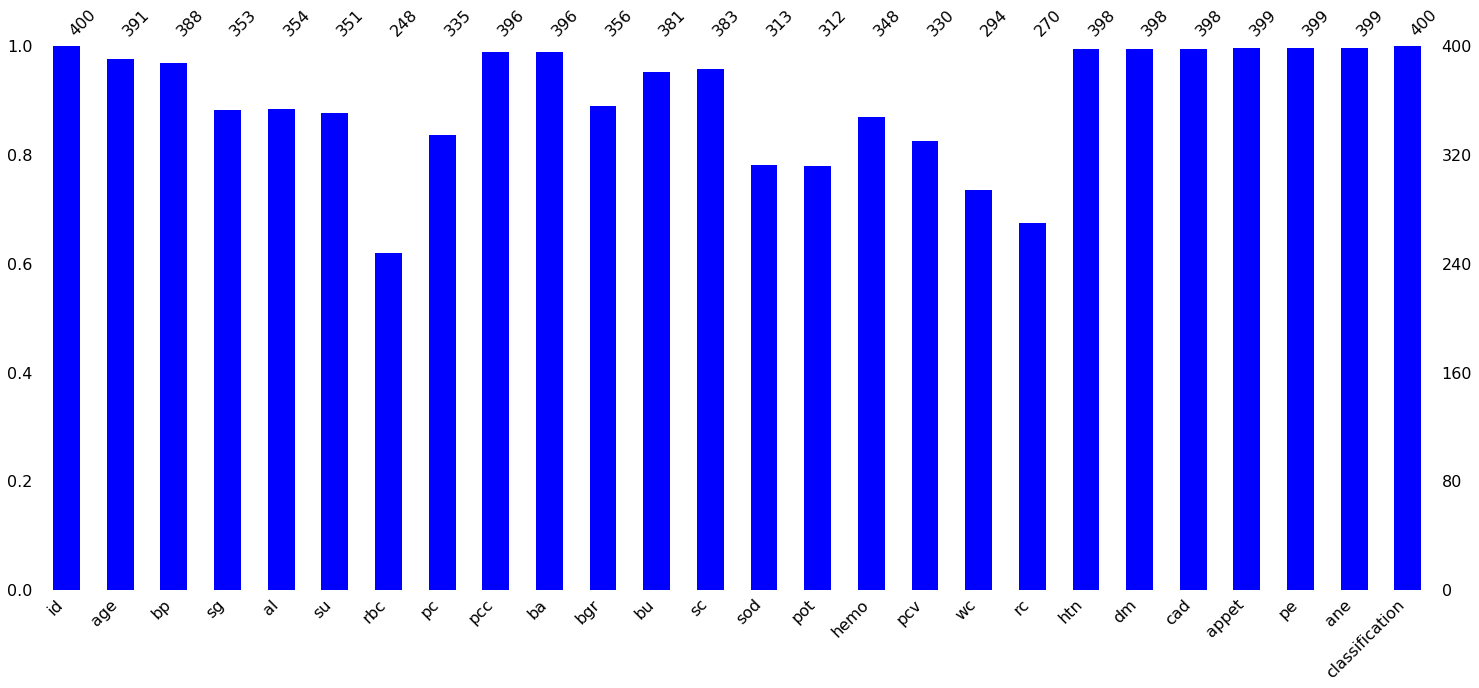

In [26]:
import missingno
missingno.bar(df, color='b')
plt.show()

In [27]:
df['rbc'].value_counts()

normal      201
abnormal     47
Name: rbc, dtype: int64

In [28]:
df.groupby(['al'])['rbc'].value_counts()

al   rbc     
0.0  normal      141
     abnormal      2
1.0  abnormal     12
     normal       10
2.0  normal       17
     abnormal     12
3.0  normal       17
     abnormal     12
4.0  normal       13
     abnormal      8
5.0  abnormal      1
Name: rbc, dtype: int64

It appears that when there is no albuminn in urine it is very likely that rbc is 'normal' than 'abnormal'. Otherwise it is likely 50:50 chance to have 'normal' or 'abnormal'. 

In [29]:
df['al'].value_counts()

0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64

We will fill missing values in the rbc column with 'normal' if the corresponding 'al' value is 0. 

In [30]:
df['rbc'] = np.where(df['al'] == 0, df['rbc'].fillna('normal'), df['rbc'])

In [31]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc                96
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                106
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [32]:
idx=df.index[df.rbc.isna()]
print(len(idx))
df.loc[np.random.choice(idx, size=int(len(idx)/2) ,replace=False),'rbc']='abnormal'
df['rbc'].isnull().sum()

96


48

In [33]:
df['rbc'] = df['rbc'].fillna('normal')

In [34]:
df['rbc'].isnull().sum()

0

In [35]:
df['rc']

0      5.2
1      NaN
2      NaN
3      3.9
4      4.6
      ... 
395    4.9
396    6.2
397    5.4
398    5.9
399    6.1
Name: rc, Length: 400, dtype: object

In [36]:
# df['rc'].astype('float')

In [37]:
df[df['rc'] =='\t?']

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
162,162,59.0,70.0,NaN,NaN,NaN,normal,NaN,notpresent,notpresent,...,37,6000,\t?,no,yes,no,good,no,no,ckd


In [38]:
df.loc[162, 'rc'] = np.nan

In [39]:
df.iloc[[162]]

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
162,162,59.0,70.0,NaN,NaN,NaN,normal,NaN,notpresent,notpresent,...,37,6000,NaN,no,yes,no,good,no,no,ckd


In [40]:
df['rc']=df['rc'].astype('float')

In [41]:
df['rc'].describe()

count    269.000000
mean       4.707435
std        1.025323
min        2.100000
25%        3.900000
50%        4.800000
75%        5.400000
max        8.000000
Name: rc, dtype: float64

In [42]:
df['hemo'].describe()

count    348.000000
mean      12.526437
std        2.912587
min        3.100000
25%       10.300000
50%       12.650000
75%       15.000000
max       17.800000
Name: hemo, dtype: float64

In [43]:
df.groupby('hemo')['rc'].mean()

hemo
3.1     2.100000
4.8          NaN
5.5     2.800000
5.6     2.600000
5.8          NaN
          ...   
17.4    5.700000
17.5    4.700000
17.6    5.000000
17.7    5.500000
17.8    5.066667
Name: rc, Length: 115, dtype: float64

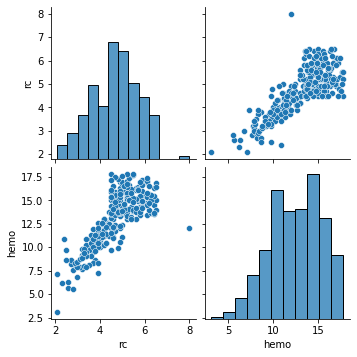

In [44]:
sns.pairplot(df[['rc', 'hemo']])

In [45]:
df['rc'] = df.groupby('hemo')['rc'].apply(lambda x:x.fillna(x.mean()))

In [46]:
df['rc']

0      5.200
1      3.825
2      3.800
3      3.900
4      4.600
       ...  
395    4.900
396    6.200
397    5.400
398    5.900
399    6.100
Name: rc, Length: 400, dtype: float64

In [47]:
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,rc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,333.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,4.579968
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,0.990329
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,2.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,3.850000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,4.600000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,5.300000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,8.000000


In [48]:
unique_number = []

for i in df.columns:
  n = df[i].value_counts().count()
  unique_number.append(n)

uni_df = pd.DataFrame(unique_number, index= df.columns, columns = ['Total Unique Values'])

In [49]:
na = df.isnull().sum()
na_df = pd.DataFrame(na, index = df.columns)

In [50]:
pd.concat([uni_df, na_df], axis=1)

,Total Unique Values,0
id,400,0
age,76,9
bp,10,12
sg,5,47
al,6,46
su,6,49
rbc,2,0
pc,2,65
pcc,2,4
ba,2,4


In [51]:
df.select_dtypes(exclude='object').columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'rc'],
      dtype='object')

In [52]:
df.select_dtypes(include='object').columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane', 'classification'],
      dtype='object')

In [53]:
df[['pcv','wc']]

,pcv,wc
0,44,7800
1,38,6000
2,31,7500
3,32,6700
4,35,7300
...,...,...
395,47,6700
396,54,7800
397,49,6600
398,51,7200


In [54]:
# df['pcv'] = df['pcv'].astype('float')

In [55]:
df['pcv']= df['pcv'].map(lambda x: np.nan if x == '\t?' else x)

In [56]:
df['pcv'] = df['pcv'].astype('float')

In [57]:
df['wc'] = df['wc'].astype('float')

In [58]:
df.select_dtypes(include='object').columns

Index(['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane',
       'classification'],
      dtype='object')

In [59]:
df.select_dtypes(exclude='object').columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc'],
      dtype='object')

In [60]:
pd.concat([uni_df, na_df], axis=1)

,Total Unique Values,0
id,400,0
age,76,9
bp,10,12
sg,5,47
al,6,46
su,6,49
rbc,2,0
pc,2,65
pcc,2,4
ba,2,4


In [61]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

In [62]:
numeric_var = ['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot','hemo', 'pcv', 'wc', 'rc']

In [63]:
categoric_var = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [64]:
imputer = imputer.fit(df[numeric_var])

In [65]:
numeric_df = df[numeric_var]

In [66]:
imputed_num_df = imputer.transform(numeric_df)

In [67]:
imputed_num_df = pd.DataFrame(imputed_num_df)

In [68]:
imputed_num_df.columns = numeric_df.columns
imputed_num_df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200
1,7.0,50.0,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,3.825
2,62.0,80.0,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,3.800
3,48.0,70.0,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900
4,51.0,80.0,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,140.000000,49.0,0.5,150.000000,4.900000,15.7,47.0,6700.0,4.900
396,42.0,70.0,1.025,0.0,0.0,75.000000,31.0,1.2,141.000000,3.500000,16.5,54.0,7800.0,6.200
397,12.0,80.0,1.020,0.0,0.0,100.000000,26.0,0.6,137.000000,4.400000,15.8,49.0,6600.0,5.400
398,17.0,60.0,1.025,0.0,0.0,114.000000,50.0,1.0,135.000000,4.900000,14.2,51.0,7200.0,5.900


In [69]:
imputed_num_df.isnull().sum()

age     0
bp      0
sg      0
al      0
su      0
bgr     0
bu      0
sc      0
sod     0
pot     0
hemo    0
pcv     0
wc      0
rc      0
dtype: int64

In [70]:
imputer2 = SimpleImputer(strategy='most_frequent')

In [71]:
categoric_var_df = df[categoric_var]

In [72]:
imputed_categoric_var = imputer2.fit_transform(categoric_var_df)

In [73]:
imputed_categoric_var_df = pd.DataFrame(imputed_categoric_var)
imputed_categoric_var_df.columns = categoric_var_df.columns

In [74]:
imputed_categoric_var_df

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,abnormal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [75]:
imputed_categoric_var_df.isnull().sum()

rbc      0
pc       0
pcc      0
ba       0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
dtype: int64

In [76]:
df_new = pd.concat([imputed_categoric_var_df, imputed_num_df], axis=1)

In [77]:
df_new.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200
1,abnormal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,3.825
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,3.800
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600


In [78]:
df_new['target'] = df['classification']

In [79]:
df_new.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,target
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.0,5.200,ckd
1,abnormal,normal,notpresent,notpresent,no,no,no,good,no,no,...,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.0,3.825,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.0,3.800,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.0,3.900,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.0,4.600,ckd


### EDA
Uni-variate analysis

In [80]:
numeric_var

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

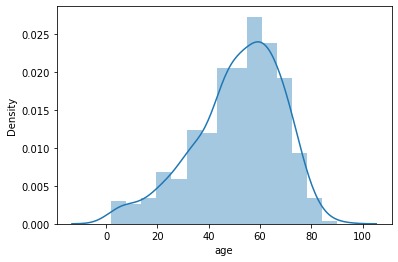

In [81]:
sns.distplot(df_new['age'])

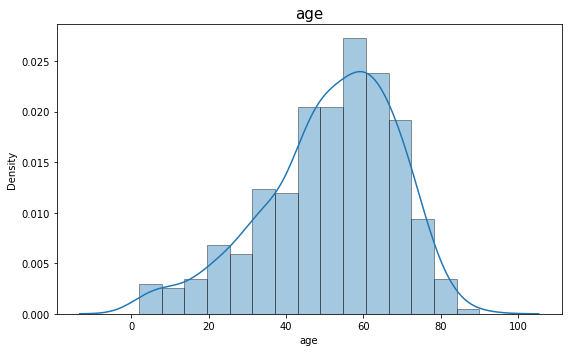

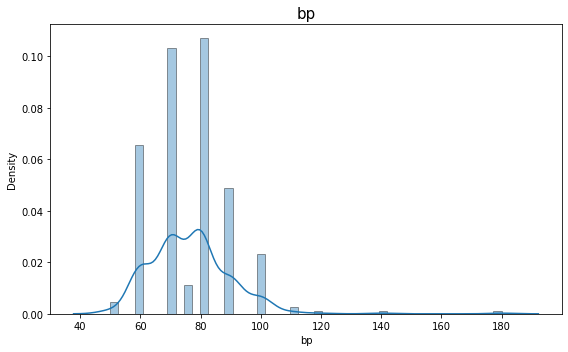

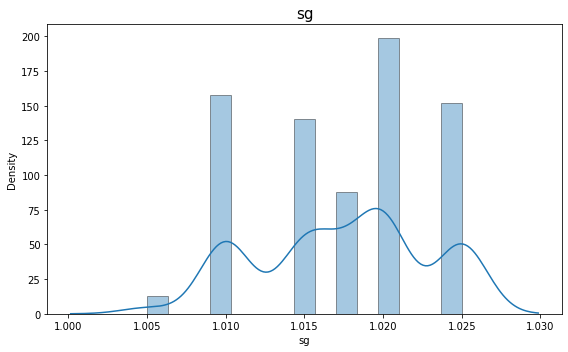

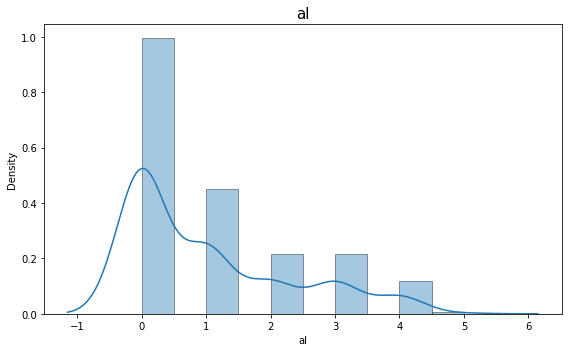

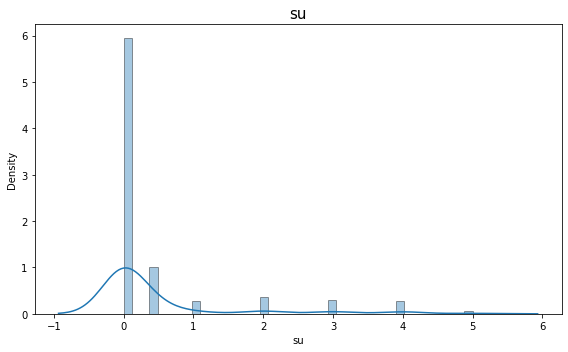

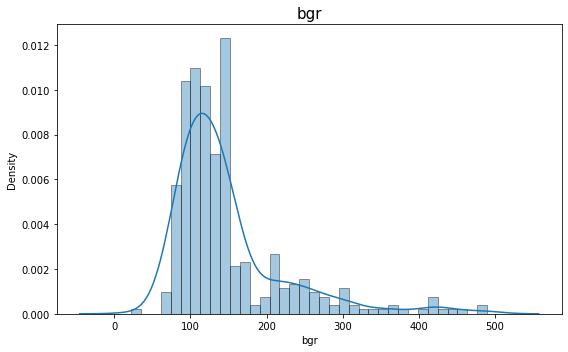

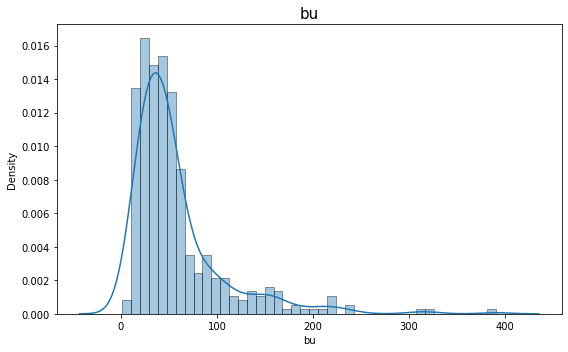

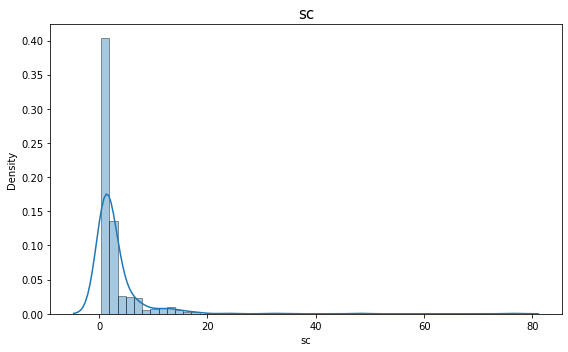

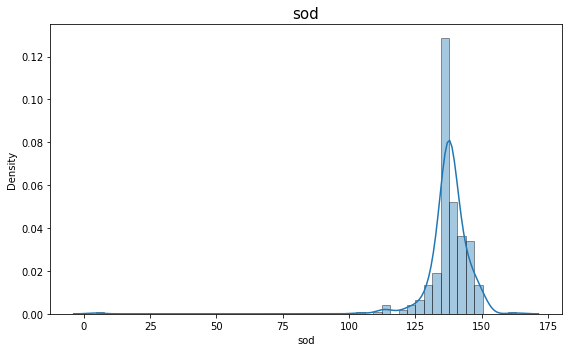

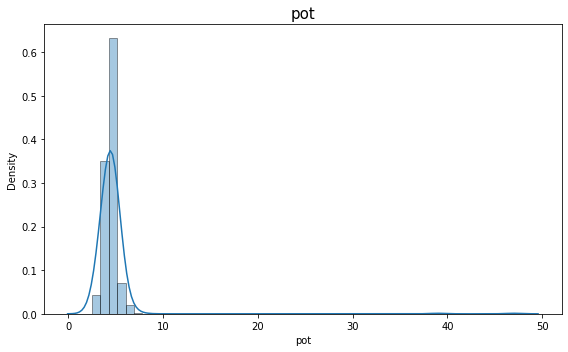

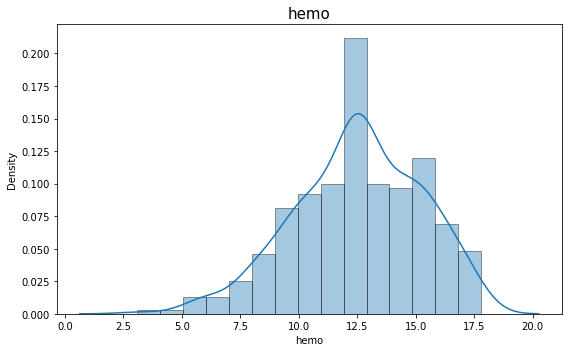

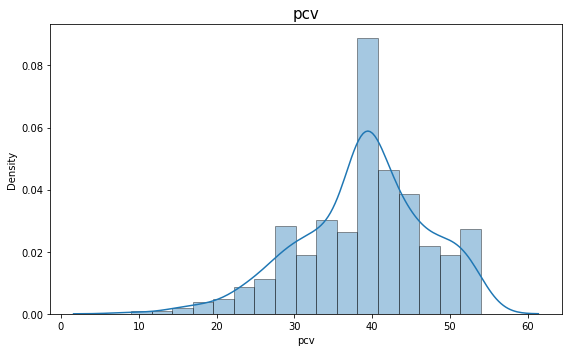

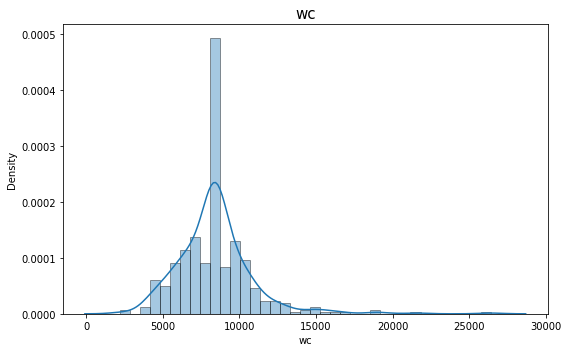

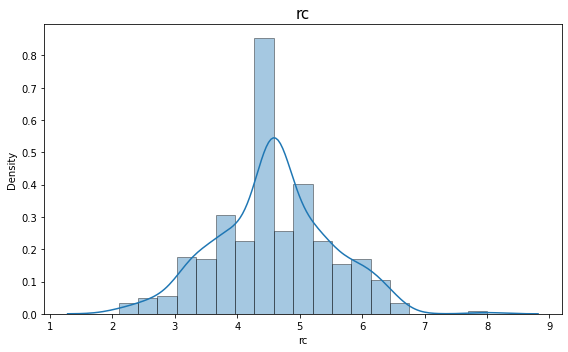

In [82]:
title_font = {'family':'arial', 'size':15}

for i in numeric_var:
  plt.figure(figsize=(8,5))
  sns.distplot(df_new[i], hist_kws=dict(edgecolor='k'))

  plt.title(i, fontdict = title_font)
  plt.tight_layout()
  plt.show()

### Categorical variables

In [83]:
categoric_var

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [84]:
df_new['rbc'].value_counts()

normal      305
abnormal     95
Name: rbc, dtype: int64

In [85]:
df_new['rbc'].value_counts().index

Index(['normal', 'abnormal'], dtype='object')

In [86]:
list(df_new['rbc'].value_counts())

[305, 95]

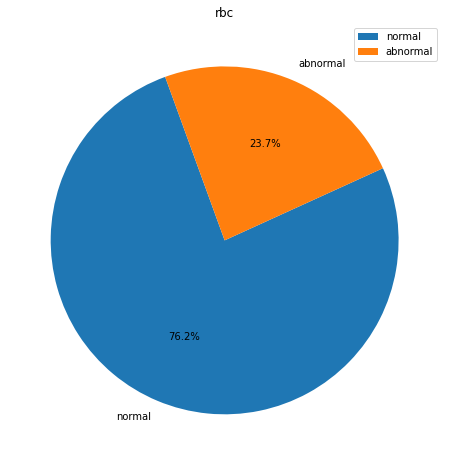

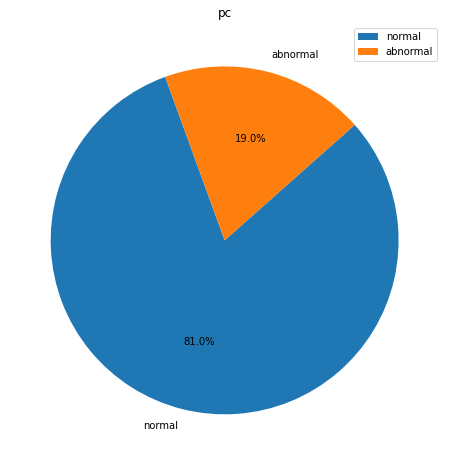

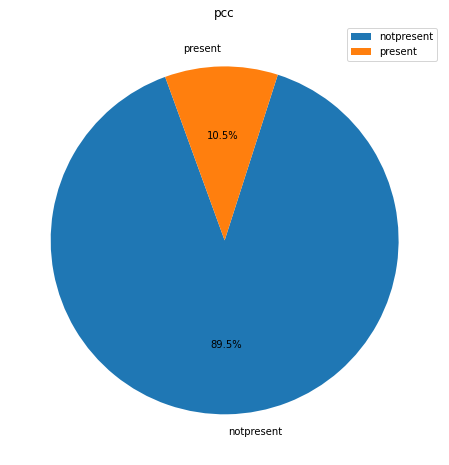

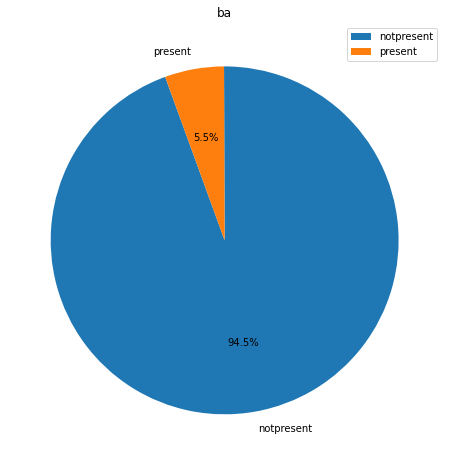

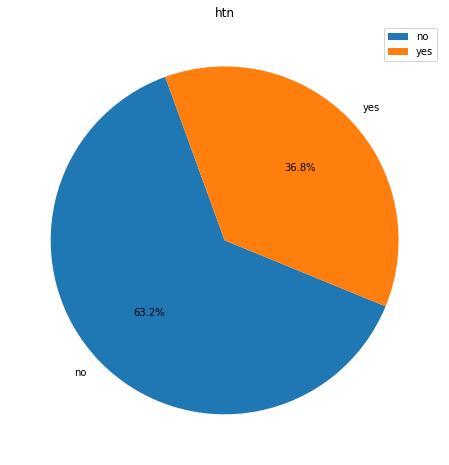

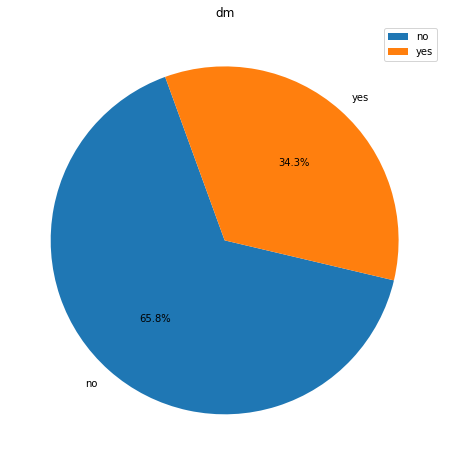

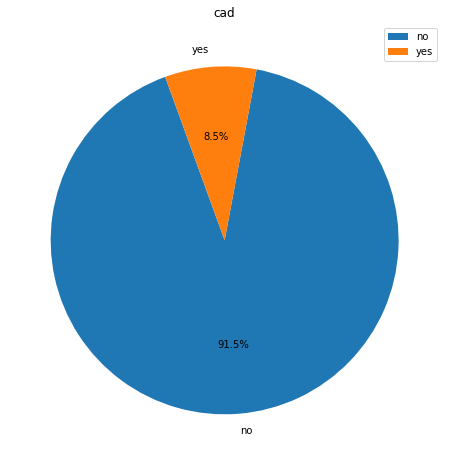

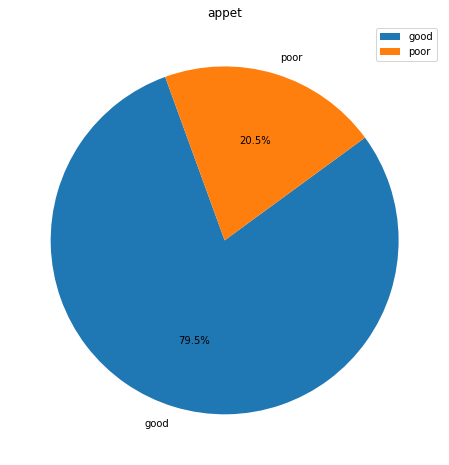

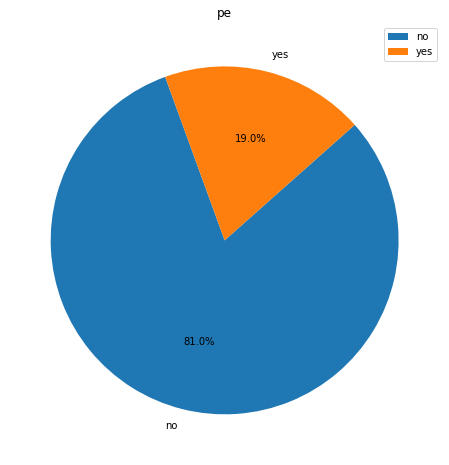

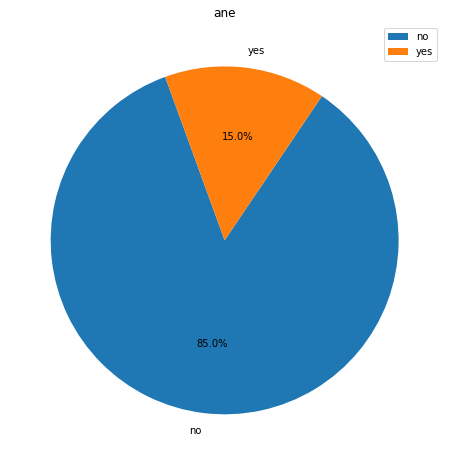

In [87]:
from matplotlib import figure
for i in categoric_var:
  fig, ax = plt.subplots(figsize = (10,8))

  ax.pie(list(df_new[i].value_counts()), labels = df_new[i].value_counts().index, autopct = '%1.1f%%', startangle= 110)

  plt.title(i)
  plt.legend()
  plt.show()

### Target value

In [88]:
df_new['target'].value_counts()

ckd       250
notckd    150
Name: target, dtype: int64

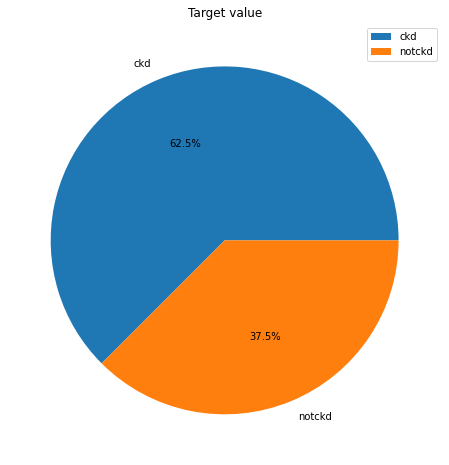

In [89]:
plt.figure(figsize = (10,8))
plt.pie(list(df_new['target'].value_counts()), labels=df_new['target'].value_counts().index, autopct = '%1.1f%%')
plt.title('Target value')
plt.legend()
plt.show()

#### Bi-varite analysis

In [90]:
numeric_var.append('target')

In [91]:
numeric_var

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'target']

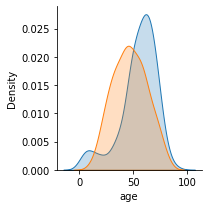

In [92]:
g = sns.FacetGrid(df_new, hue = 'target')
g = g.map(sns.kdeplot, 'age', shade=True)

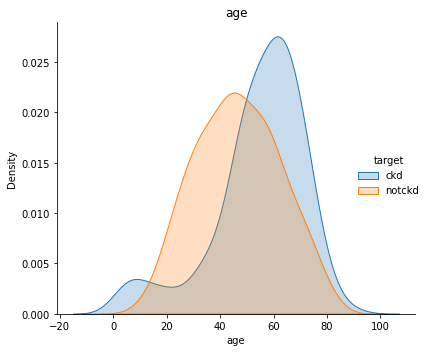

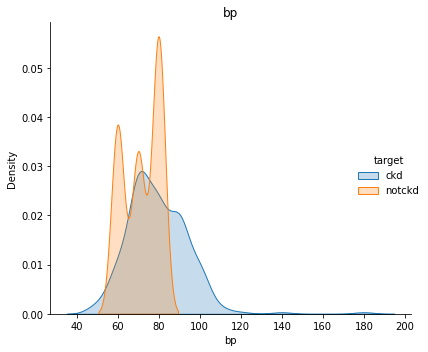

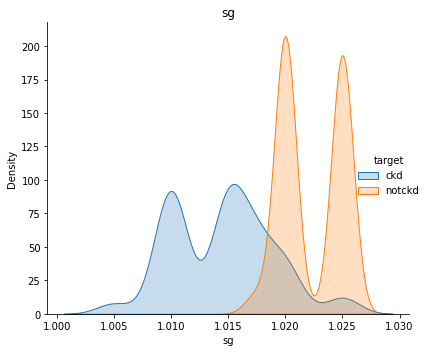

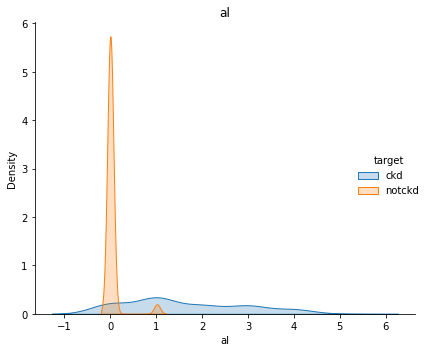

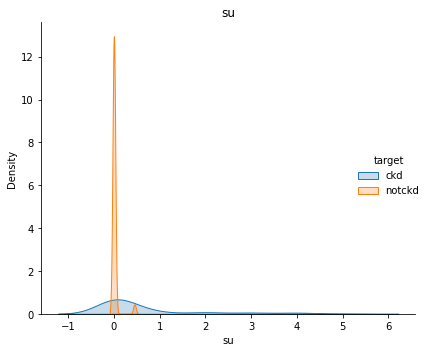

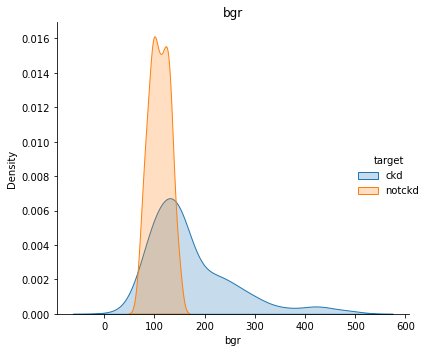

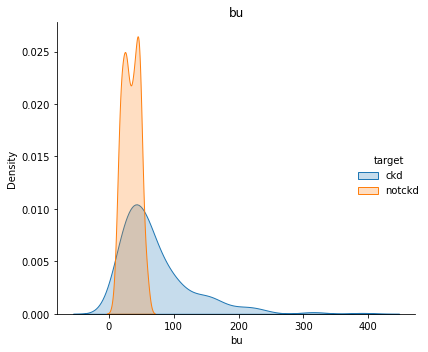

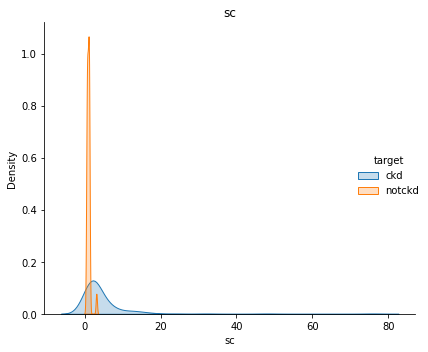

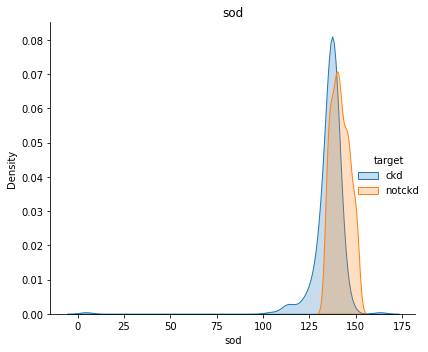

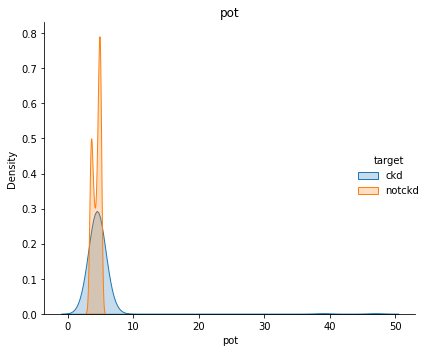

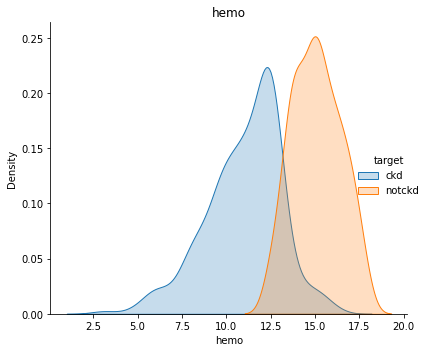

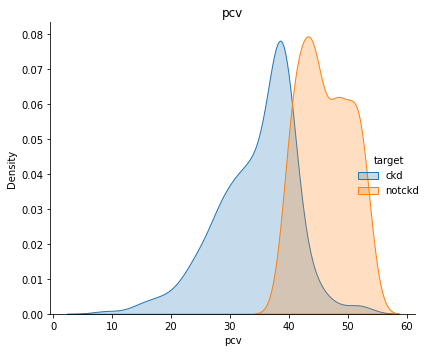

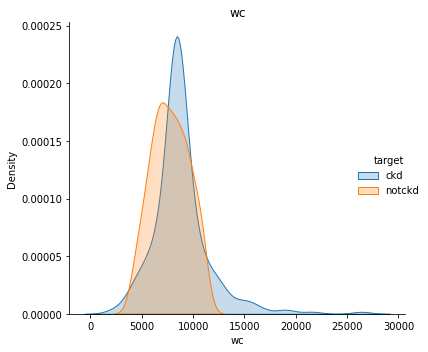

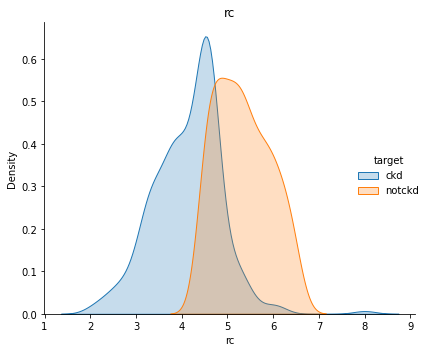

In [93]:
for i in numeric_var[:-1]:

  g = sns.FacetGrid(df_new[numeric_var], hue='target', height = 5)
  g = g.map(sns.kdeplot, i, shade = True)
  g.add_legend()

  plt.title(i)
  plt.tight_layout()
  plt.show()

In [94]:
df_new['target'] = df_new['target'].map(lambda x: 0 if x =='notckd' else 1)

In [95]:
df_new.target

0      1
1      1
2      1
3      1
4      1
      ..
395    0
396    0
397    0
398    0
399    0
Name: target, Length: 400, dtype: int64

In [96]:
df_new[numeric_var].corr()['target']

age       0.225405
bp        0.290600
sg       -0.698957
al        0.599238
su        0.327812
bgr       0.401374
bu        0.372033
sc        0.294079
sod      -0.342288
pot       0.076921
hemo     -0.729628
pcv      -0.690060
wc        0.205274
rc       -0.643431
target    1.000000
Name: target, dtype: float64

### Categorical variables

In [97]:
categoric_var

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

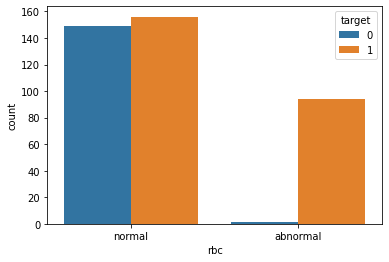

In [98]:
sns.countplot('rbc', data= df_new, hue='target')

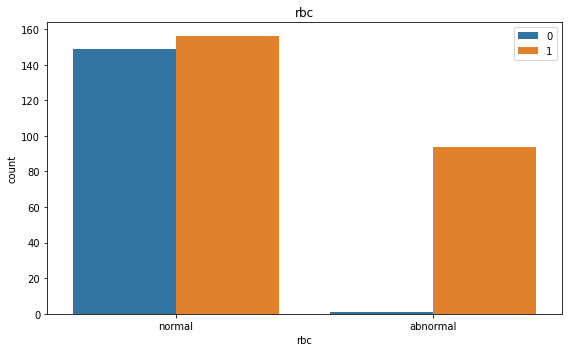

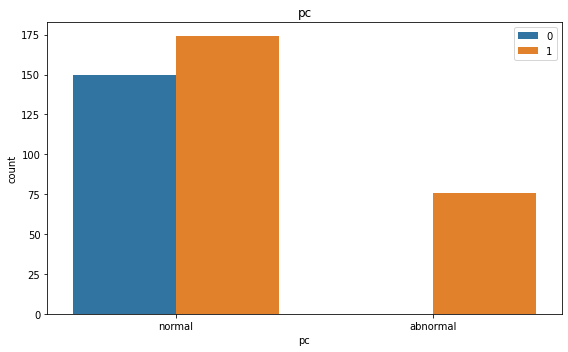

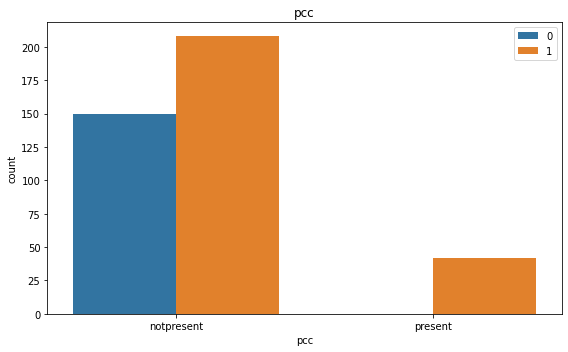

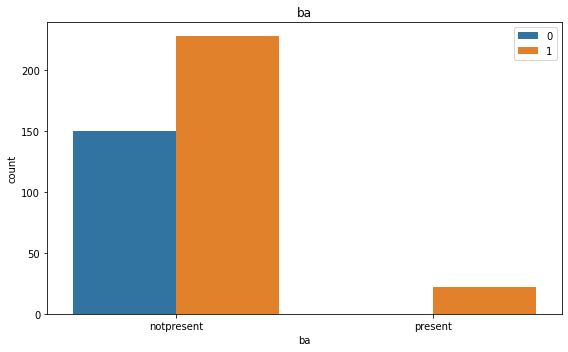

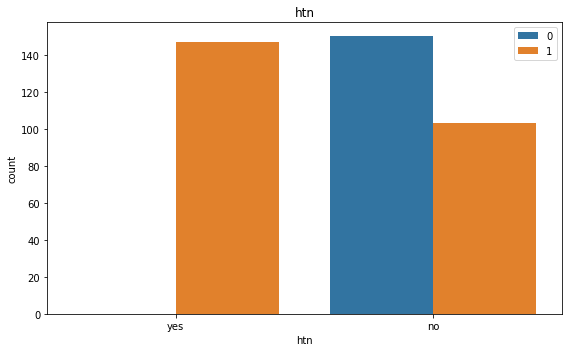

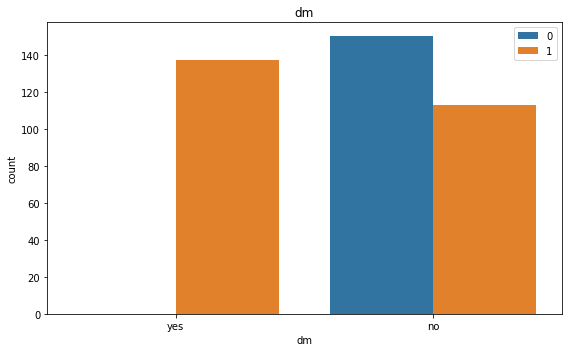

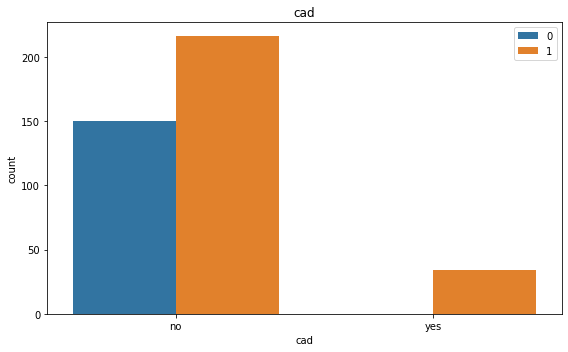

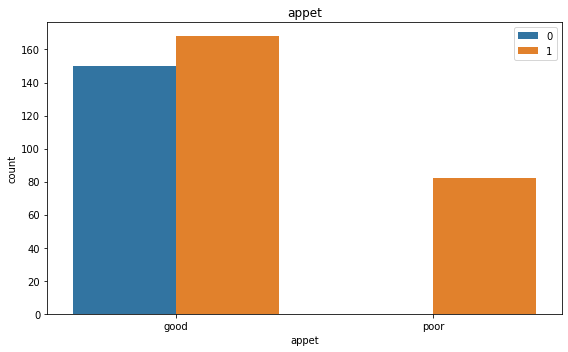

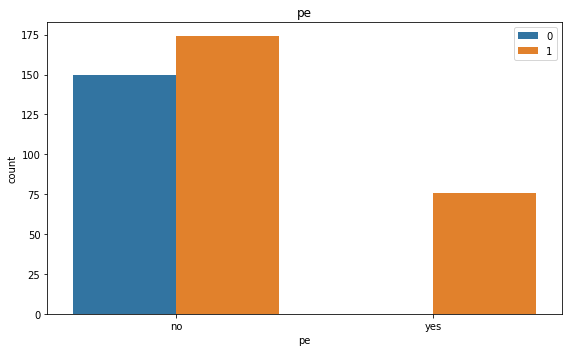

In [99]:
for i in categoric_var[:-1]:
  plt.figure(figsize = (8,5))

  sns.countplot(i, data=df_new, hue='target')

  plt.legend()
  plt.title(i)
  plt.tight_layout()
  plt.show()

#### Feature Scailing with the RobustScaler Method

In [100]:
from sklearn.preprocessing import RobustScaler
rb = RobustScaler()

In [101]:
numeric_var[:-1]

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [102]:
df_new[numeric_var[:-1]].head(10)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.000000,1.020,1.0,0.0,121.000000,36.0,1.2,137.528754,4.627244,15.4,44.0,7800.000000,5.200000
1,7.0,50.000000,1.020,4.0,0.0,148.036517,18.0,0.8,137.528754,4.627244,11.3,38.0,6000.000000,3.825000
2,62.0,80.000000,1.010,2.0,3.0,423.000000,53.0,1.8,137.528754,4.627244,9.6,31.0,7500.000000,3.800000
3,48.0,70.000000,1.005,4.0,0.0,117.000000,56.0,3.8,111.000000,2.500000,11.2,32.0,6700.000000,3.900000
4,51.0,80.000000,1.010,2.0,0.0,106.000000,26.0,1.4,137.528754,4.627244,11.6,35.0,7300.000000,4.600000
5,60.0,90.000000,1.015,3.0,0.0,74.000000,25.0,1.1,142.000000,3.200000,12.2,39.0,7800.000000,4.400000
6,68.0,70.000000,1.010,0.0,0.0,100.000000,54.0,24.0,104.000000,4.000000,12.4,36.0,8406.122449,4.666667
7,24.0,76.469072,1.015,2.0,4.0,410.000000,31.0,1.1,137.528754,4.627244,12.4,44.0,6900.000000,5.000000
8,52.0,100.000000,1.015,3.0,0.0,138.000000,60.0,1.9,137.528754,4.627244,10.8,33.0,9600.000000,4.000000
9,53.0,90.000000,1.020,2.0,0.0,70.000000,107.0,7.2,114.000000,3.700000,9.5,29.0,12100.000000,3.700000


In [103]:
scailed_df = rb.fit_transform(df_new[numeric_var[:-1]])

In [104]:
scailed_df = pd.DataFrame(scailed_df, columns = df_new[numeric_var[:-1]].columns)

In [105]:
scailed_df.head(10)

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,-0.272727,0.176546,0.518414,0.0,0.000000,-0.102041,-0.230216,-0.092062,0.000000,0.000000,0.766284,0.51155,-0.249947,0.516694
1,-2.136364,-2.823454,0.518414,1.5,0.000000,0.449725,-0.748201,-0.276185,0.000000,0.000000,-0.327050,-0.08845,-0.992215,-0.629140
2,0.363636,0.176546,-1.481586,0.5,6.664557,6.061224,0.258993,0.184124,0.000000,0.000000,-0.780383,-0.78845,-0.373659,-0.649973
3,-0.272727,-0.823454,-2.481586,1.5,0.000000,-0.183673,0.345324,1.104741,-4.421459,-2.659054,-0.353716,-0.68845,-0.703556,-0.566640
4,-0.136364,0.176546,-1.481586,0.5,0.000000,-0.408163,-0.517986,0.000000,0.000000,0.000000,-0.247050,-0.38845,-0.456133,0.016694
5,0.272727,1.176546,-0.481586,1.0,0.000000,-1.061224,-0.546763,-0.138093,0.745208,-1.784054,-0.087050,0.01155,-0.249947,-0.149973
6,0.636364,-0.823454,-1.481586,-0.5,0.000000,-0.530612,0.287770,10.402981,-5.588126,-0.784054,-0.033716,-0.28845,0.000000,0.072249
7,-1.363636,-0.176546,-0.481586,0.5,8.886076,5.795918,-0.374101,-0.138093,0.000000,0.000000,-0.033716,0.51155,-0.621081,0.350027
8,-0.090909,2.176546,-0.481586,1.0,0.000000,0.244898,0.460432,0.230154,0.000000,0.000000,-0.460383,-0.58845,0.492321,-0.483306
9,-0.045455,1.176546,0.518414,0.5,0.000000,-1.142857,1.812950,2.669791,-3.921459,-1.159054,-0.807050,-0.98845,1.523248,-0.733306


#### Creating a New DataFrame with the Melt() Function

In [106]:
scailed_df['target'] = df_new['target']

In [107]:
scailed_df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,target
0,-0.272727,0.176546,0.518414,0.0,0.000000,-0.102041,-0.230216,-0.092062,0.000000,0.000000,0.766284,0.51155,-0.249947,0.516694,1
1,-2.136364,-2.823454,0.518414,1.5,0.000000,0.449725,-0.748201,-0.276185,0.000000,0.000000,-0.327050,-0.08845,-0.992215,-0.629140,1
2,0.363636,0.176546,-1.481586,0.5,6.664557,6.061224,0.258993,0.184124,0.000000,0.000000,-0.780383,-0.78845,-0.373659,-0.649973,1
3,-0.272727,-0.823454,-2.481586,1.5,0.000000,-0.183673,0.345324,1.104741,-4.421459,-2.659054,-0.353716,-0.68845,-0.703556,-0.566640,1
4,-0.136364,0.176546,-1.481586,0.5,0.000000,-0.408163,-0.517986,0.000000,0.000000,0.000000,-0.247050,-0.38845,-0.456133,0.016694,1


In [108]:
melted_df = pd.melt(scailed_df, id_vars='target', var_name='variables', value_name='value')

In [109]:
melted_df

,target,variables,value
0,1,age,-0.272727
1,1,age,-2.136364
2,1,age,0.363636
3,1,age,-0.272727
4,1,age,-0.136364
...,...,...,...
5595,0,rc,0.266694
5596,0,rc,1.350027
5597,0,rc,0.683360
5598,0,rc,1.100027


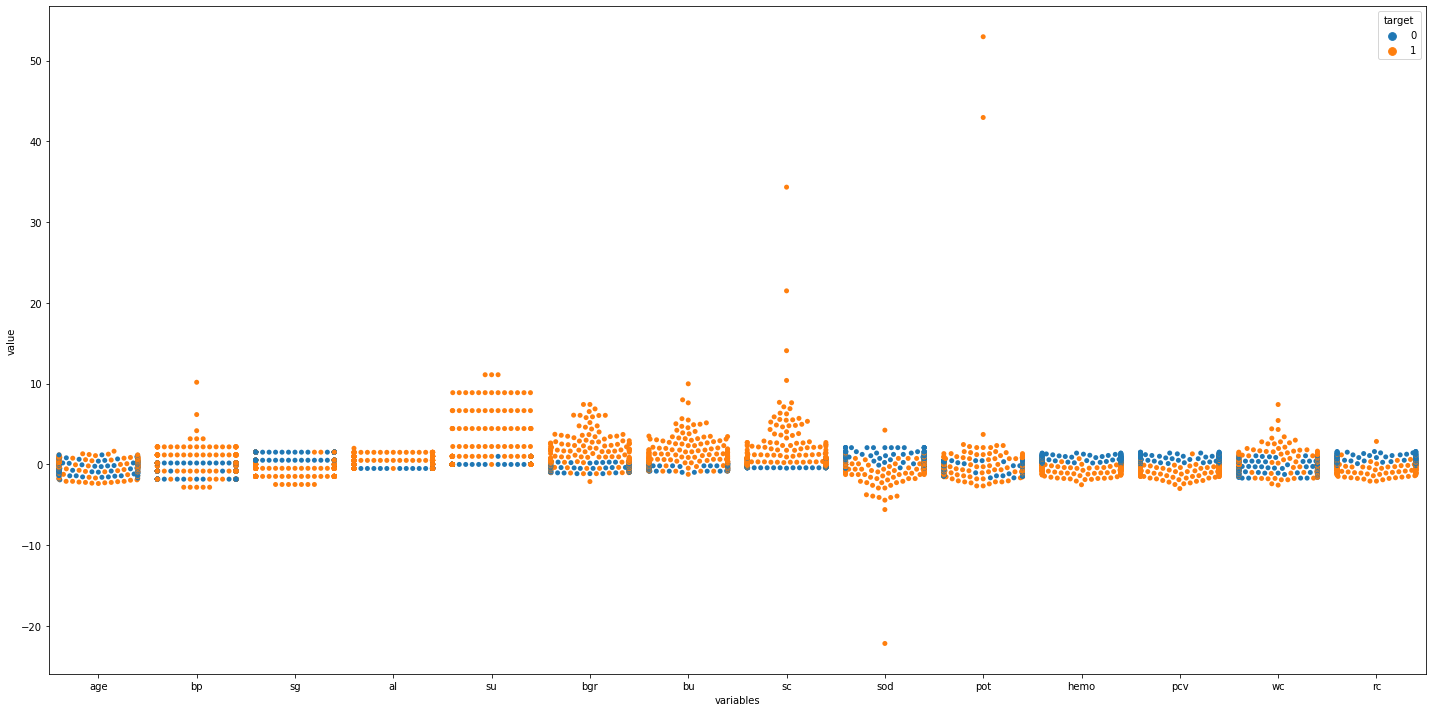

In [110]:
plt.figure(figsize = (20,10))
sns.swarmplot(x='variables', y='value', hue='target', data=melted_df)
plt.tight_layout();

#### Numerical Variables - Categorical Variables

In [111]:
categoric_var

['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

In [112]:
numeric_var[:-1]

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

In [113]:
scailed_df.drop('target', axis =1, inplace = True)

In [114]:
scailed_df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,-0.272727,0.176546,0.518414,0.0,0.000000,-0.102041,-0.230216,-0.092062,0.000000,0.000000,0.766284,0.51155,-0.249947,0.516694
1,-2.136364,-2.823454,0.518414,1.5,0.000000,0.449725,-0.748201,-0.276185,0.000000,0.000000,-0.327050,-0.08845,-0.992215,-0.629140
2,0.363636,0.176546,-1.481586,0.5,6.664557,6.061224,0.258993,0.184124,0.000000,0.000000,-0.780383,-0.78845,-0.373659,-0.649973
3,-0.272727,-0.823454,-2.481586,1.5,0.000000,-0.183673,0.345324,1.104741,-4.421459,-2.659054,-0.353716,-0.68845,-0.703556,-0.566640
4,-0.136364,0.176546,-1.481586,0.5,0.000000,-0.408163,-0.517986,0.000000,0.000000,0.000000,-0.247050,-0.38845,-0.456133,0.016694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.045455,0.176546,0.518414,-0.5,0.000000,0.285714,0.143885,-0.414278,2.078541,0.340946,0.846284,0.81155,-0.703556,0.266694
396,-0.545455,-0.823454,1.518414,-0.5,0.000000,-1.040816,-0.374101,-0.092062,0.578541,-1.409054,1.059617,1.51155,-0.249947,1.350027
397,-1.909091,0.176546,0.518414,-0.5,0.000000,-0.530612,-0.517986,-0.368247,-0.088126,-0.284054,0.872950,1.01155,-0.744793,0.683360
398,-1.681818,-1.823454,1.518414,-0.5,0.000000,-0.244898,0.172662,-0.184124,-0.421459,0.340946,0.446284,1.21155,-0.497370,1.100027


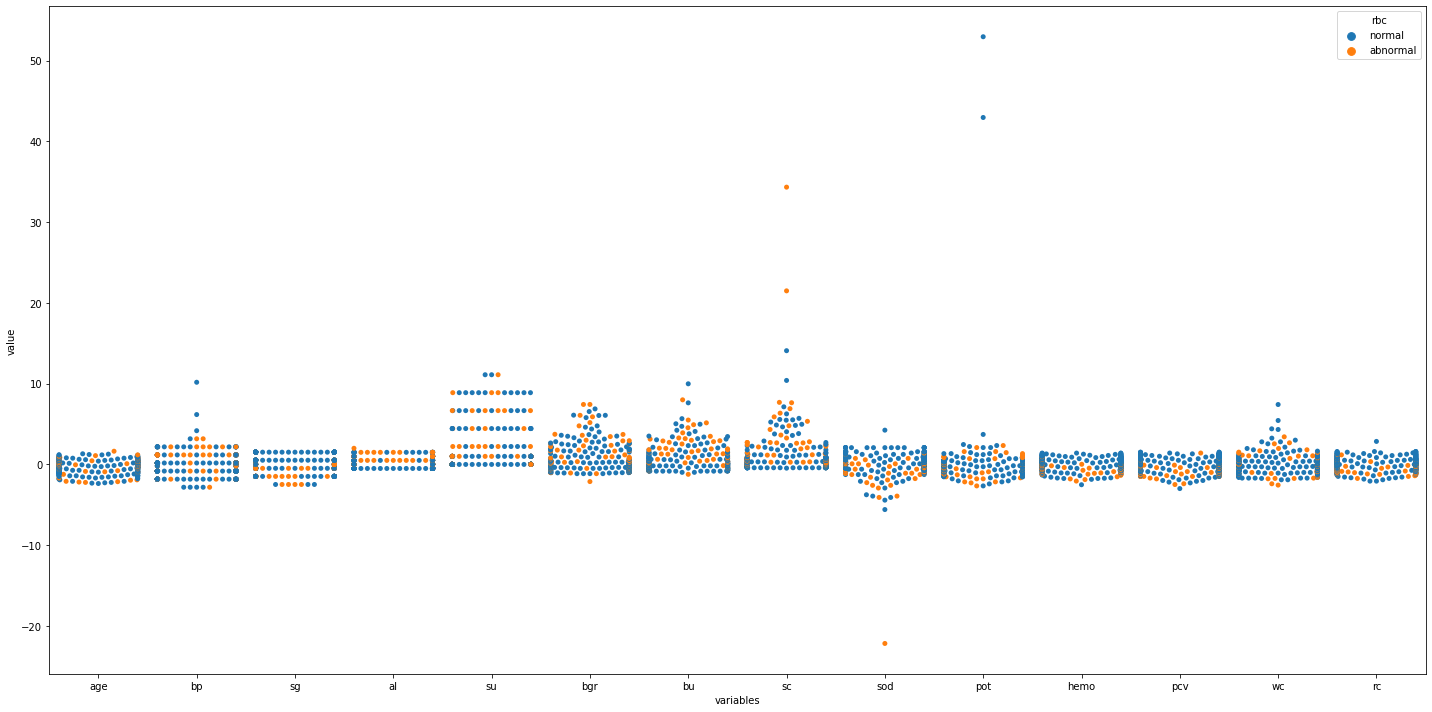

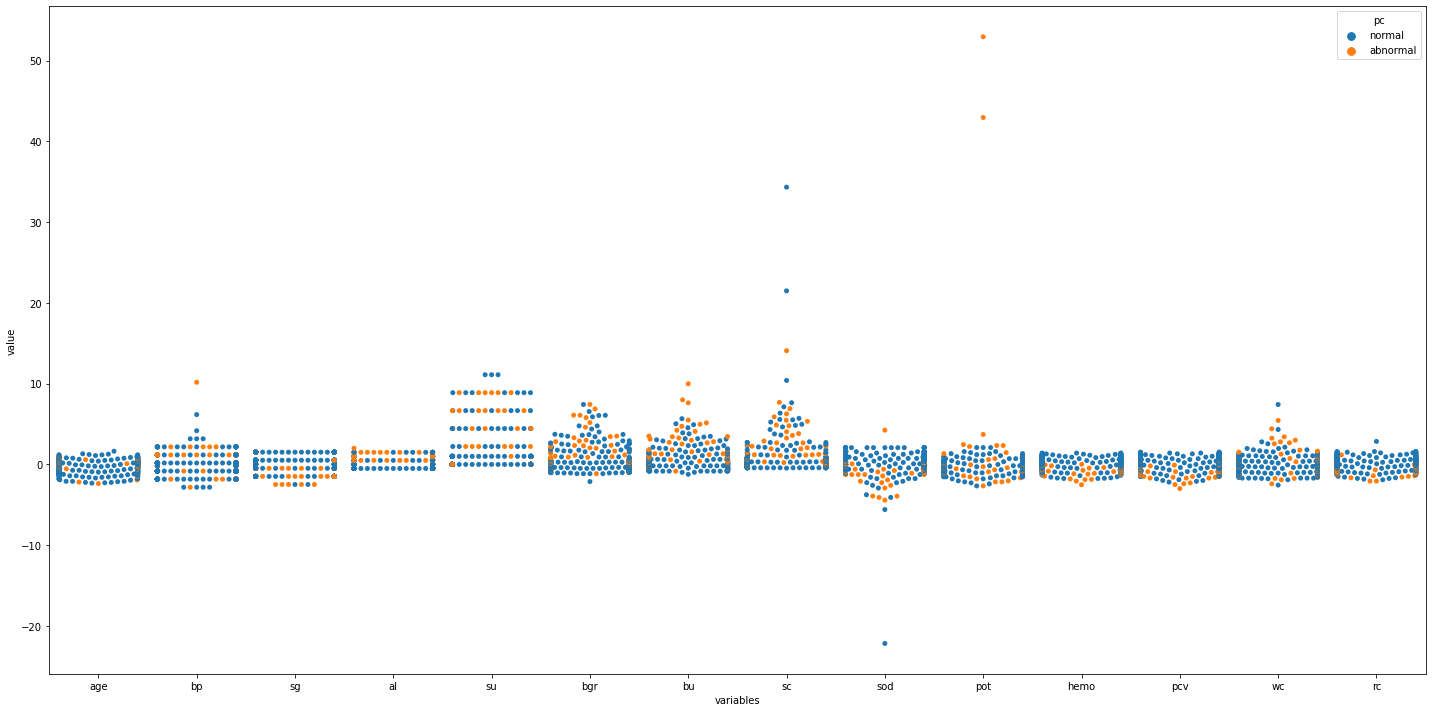

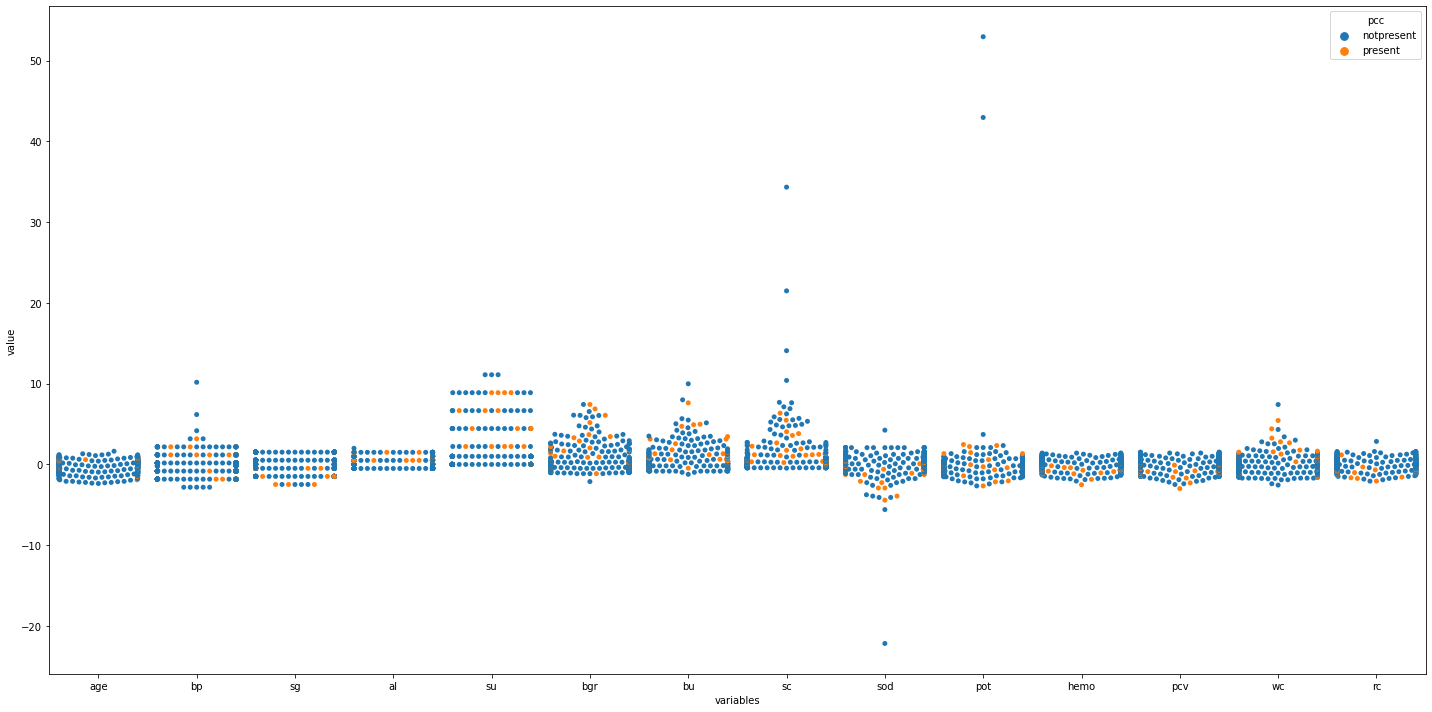

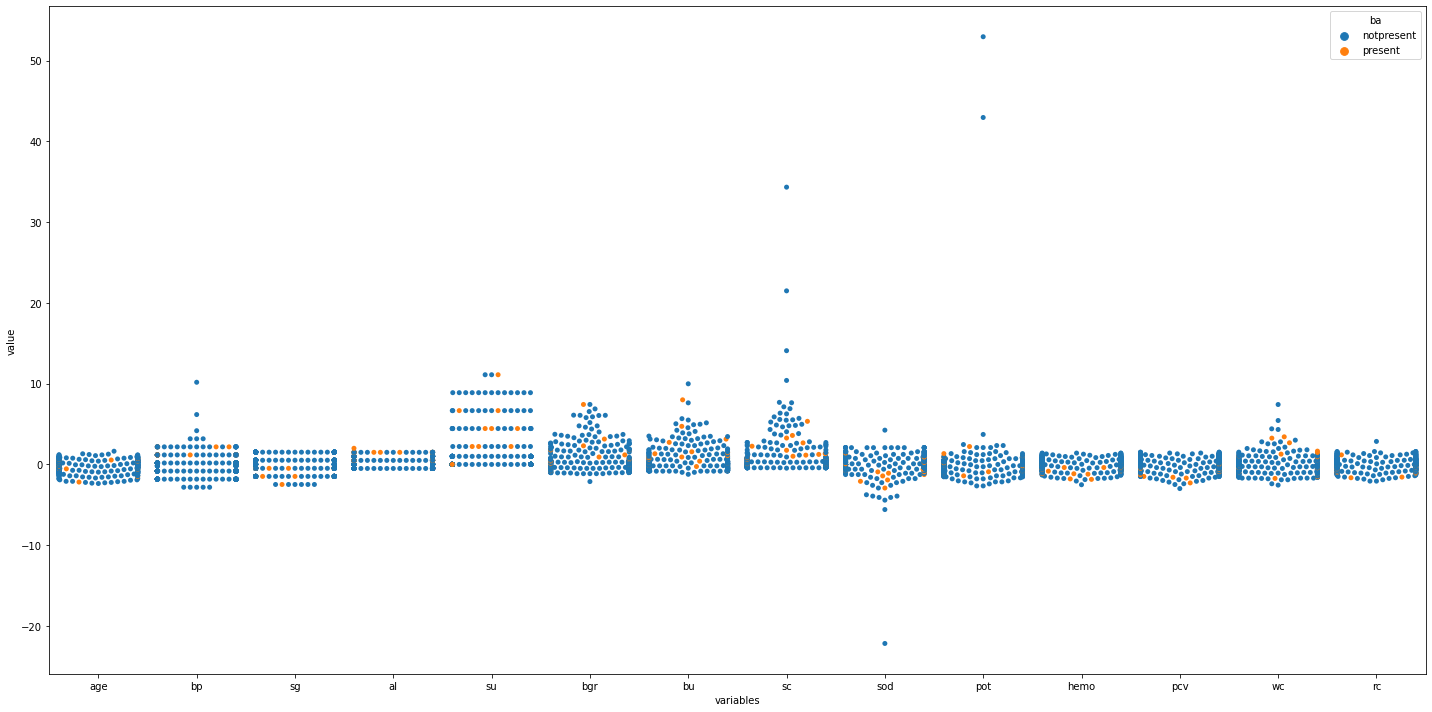

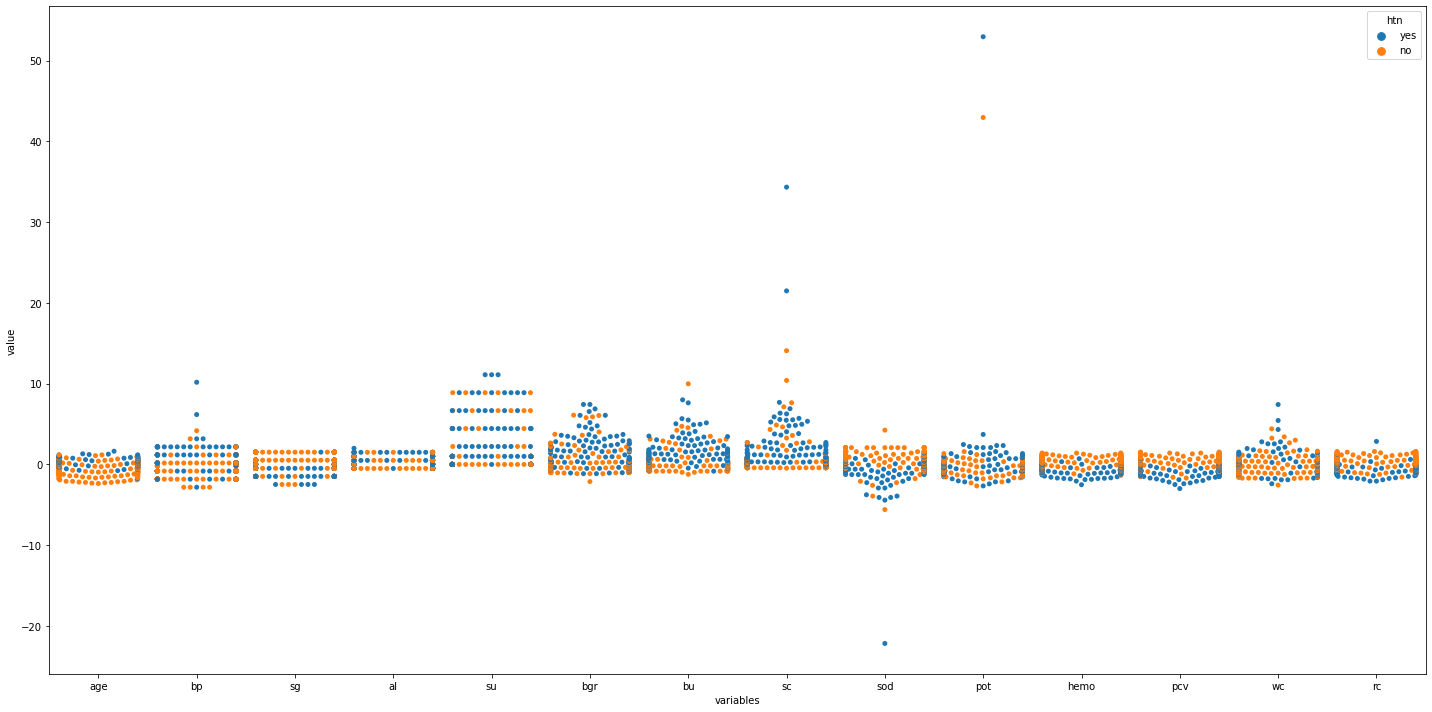

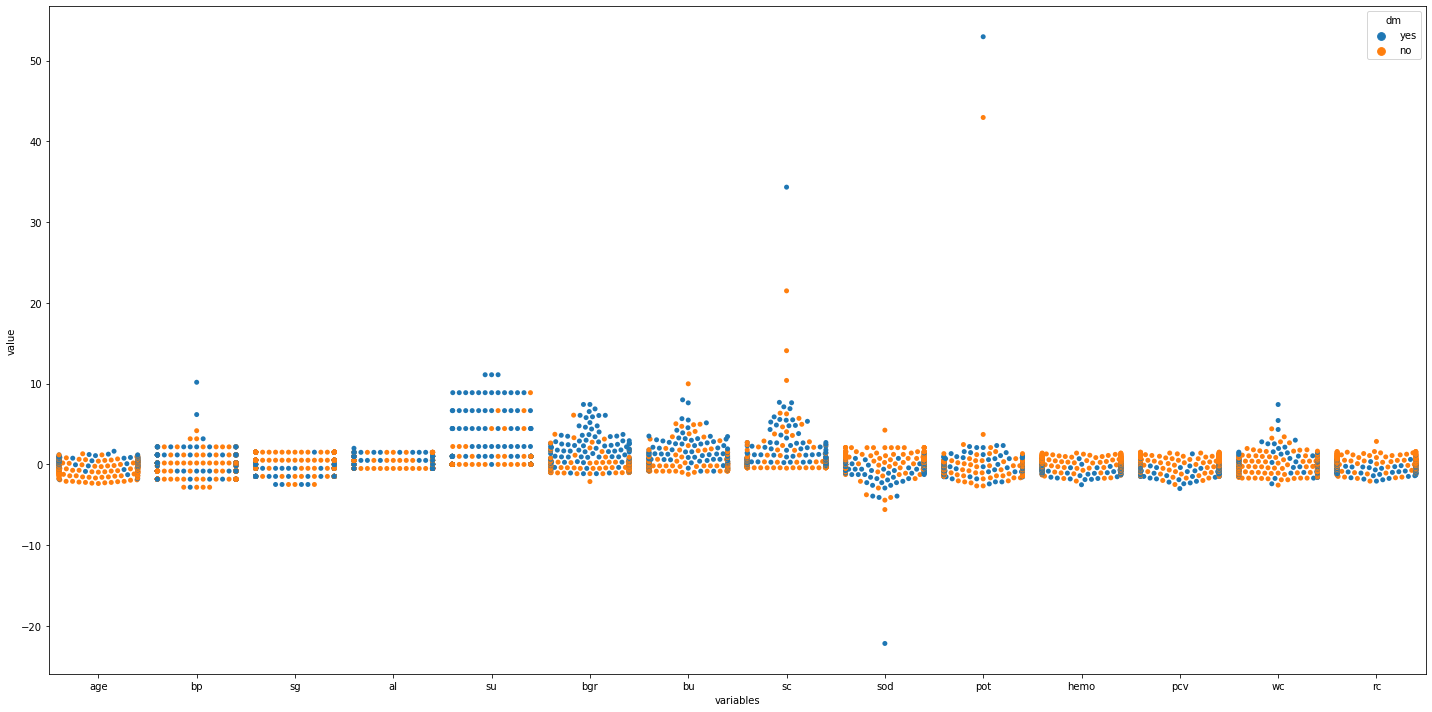

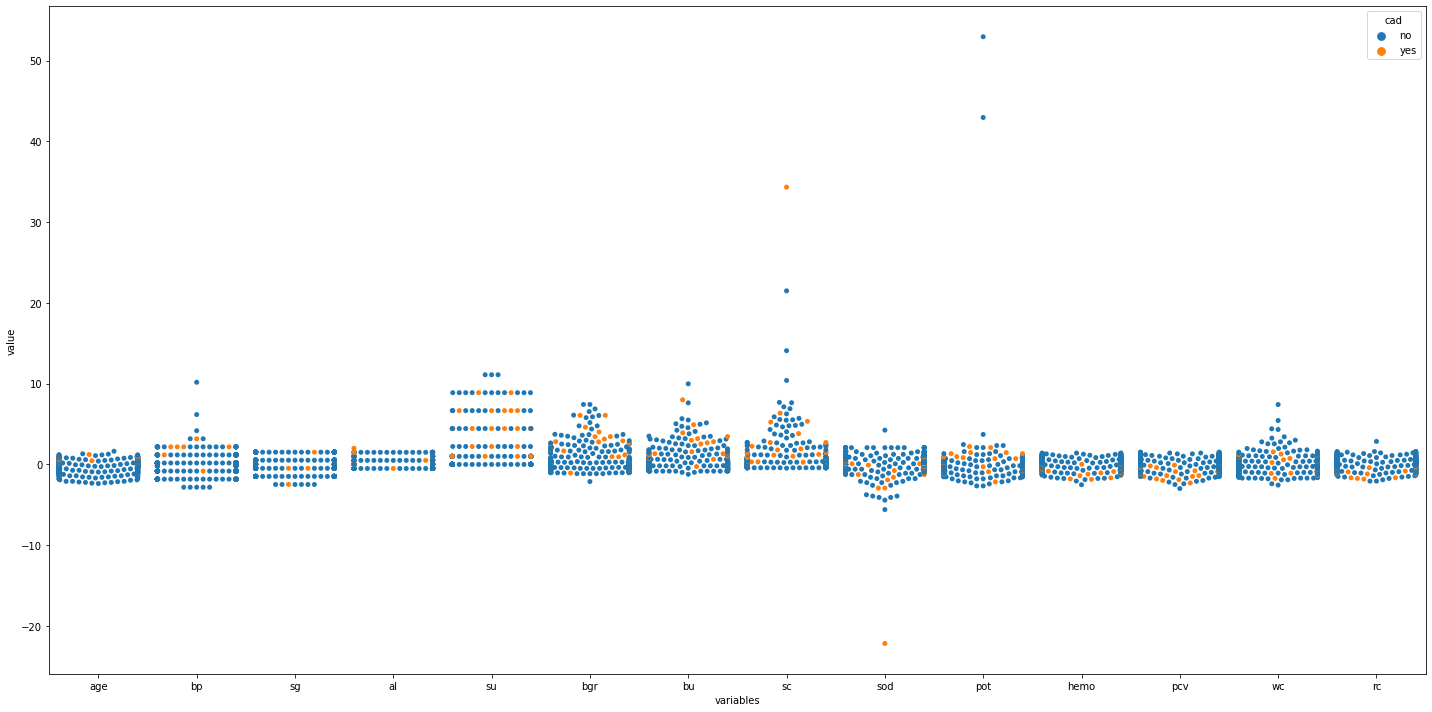

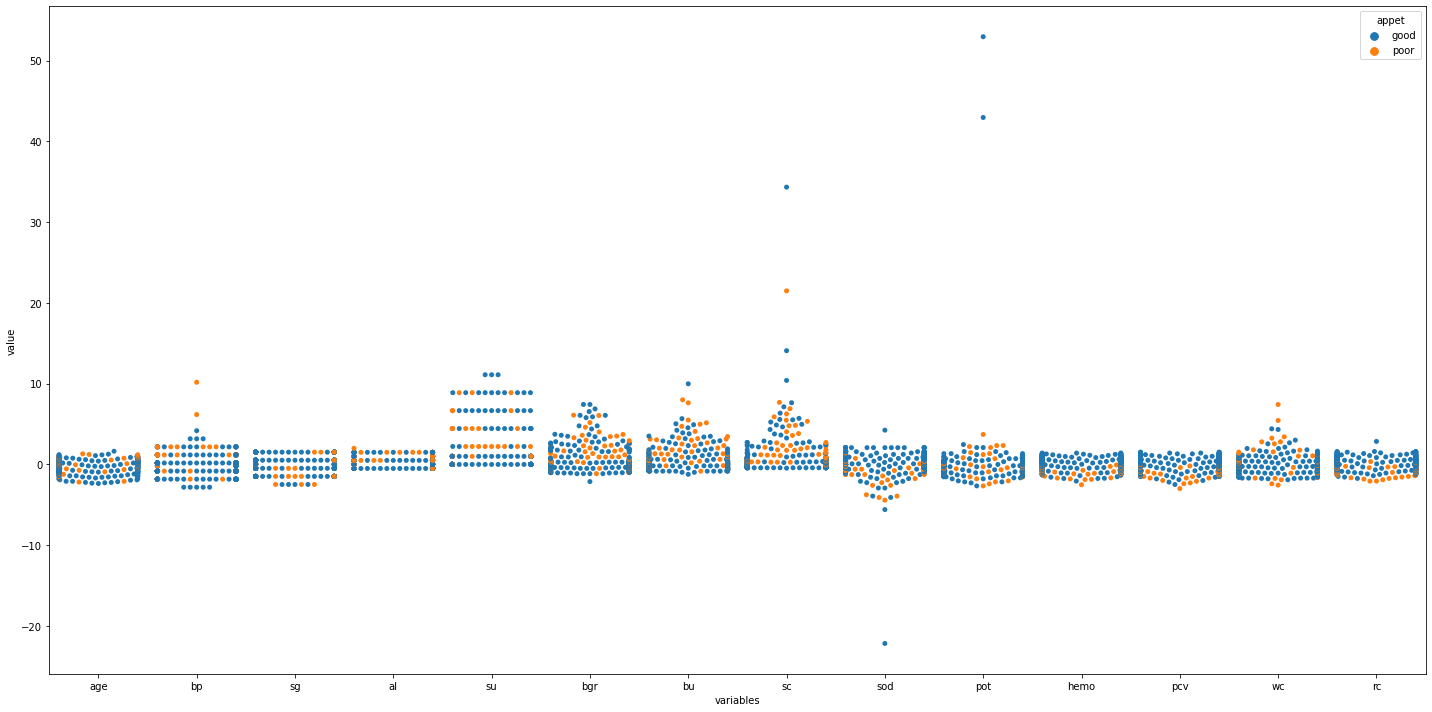

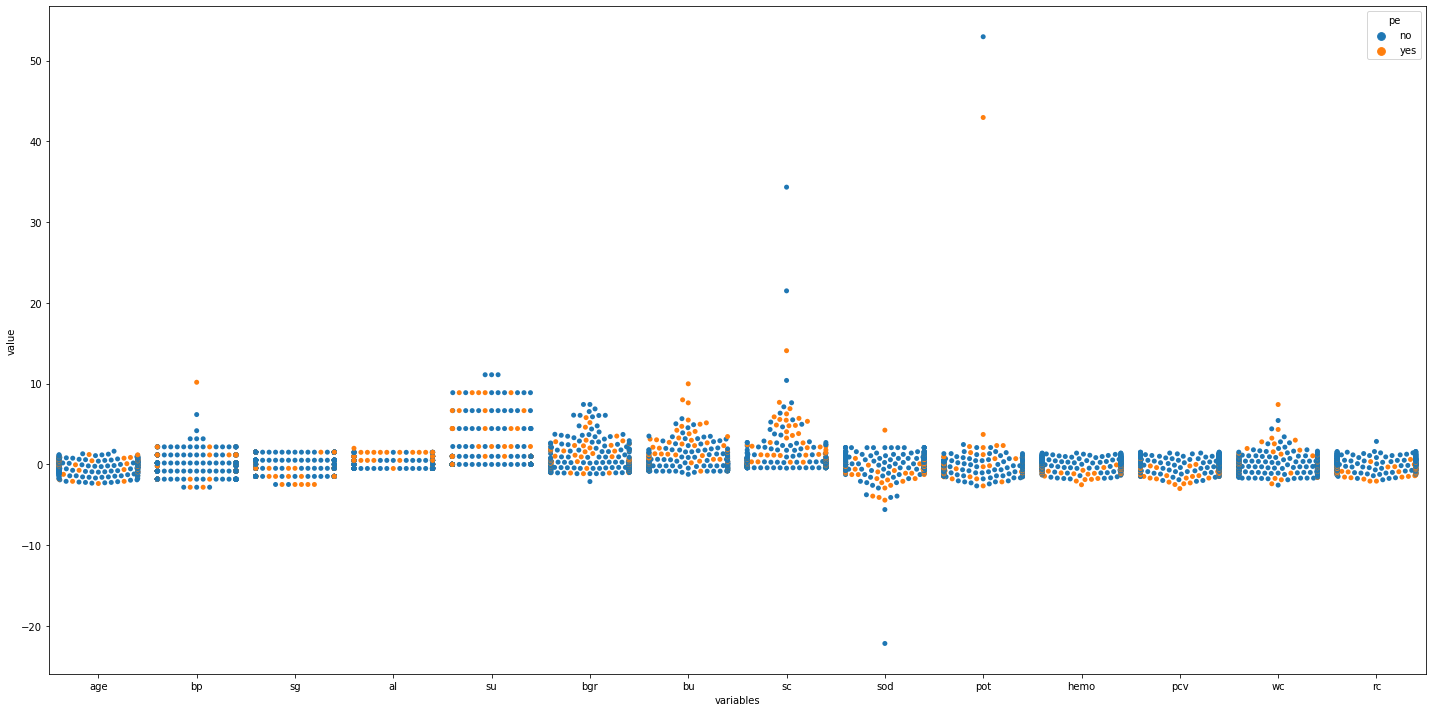

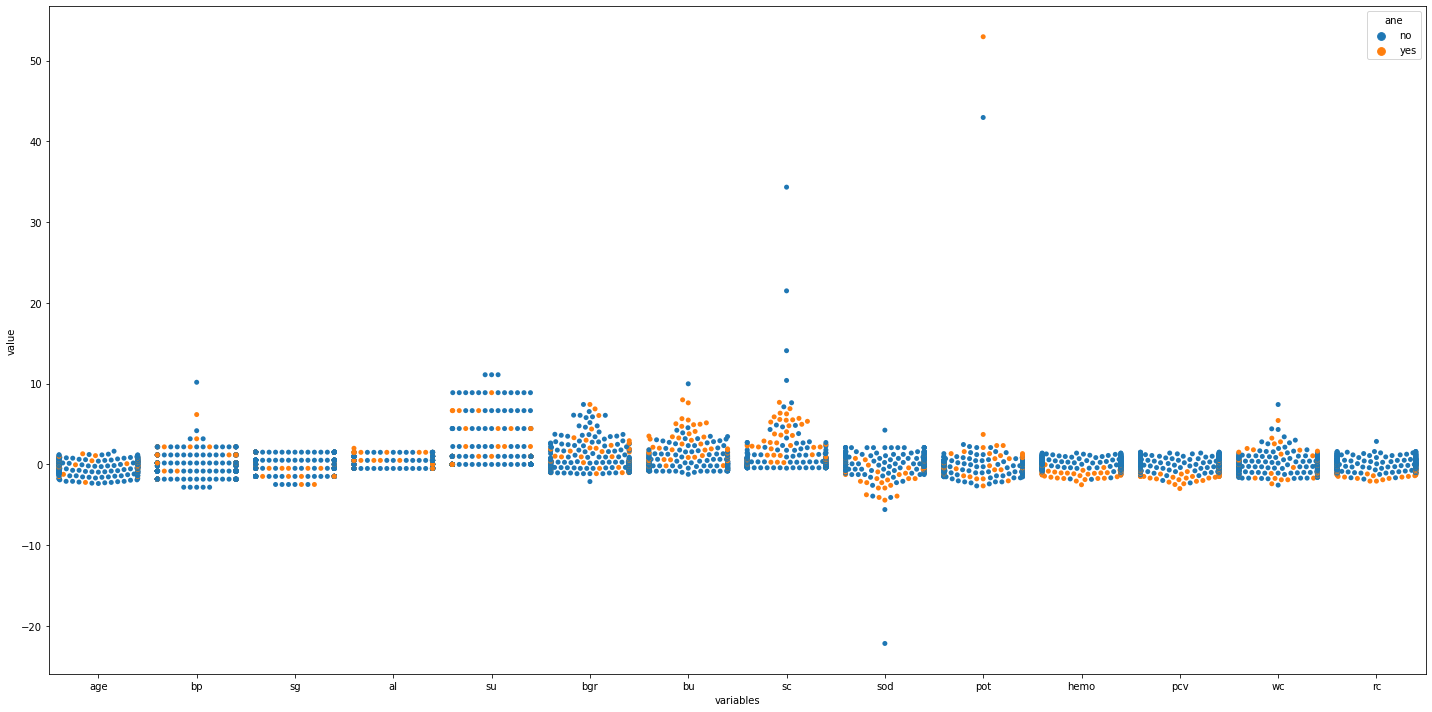

In [115]:
for i in categoric_var:
  scailed_df[i] = df_new[i]
  melted = pd.melt(scailed_df, id_vars=i, var_name='variables', value_name='value')
  plt.figure(figsize = (20,10))
  sns.swarmplot(x='variables', y = 'value', hue=i, data=melted)
  scailed_df.drop(i, axis=1, inplace=True)
  plt.tight_layout()

Analysis with Heatmap

In [116]:
scailed_df

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,-0.272727,0.176546,0.518414,0.0,0.000000,-0.102041,-0.230216,-0.092062,0.000000,0.000000,0.766284,0.51155,-0.249947,0.516694
1,-2.136364,-2.823454,0.518414,1.5,0.000000,0.449725,-0.748201,-0.276185,0.000000,0.000000,-0.327050,-0.08845,-0.992215,-0.629140
2,0.363636,0.176546,-1.481586,0.5,6.664557,6.061224,0.258993,0.184124,0.000000,0.000000,-0.780383,-0.78845,-0.373659,-0.649973
3,-0.272727,-0.823454,-2.481586,1.5,0.000000,-0.183673,0.345324,1.104741,-4.421459,-2.659054,-0.353716,-0.68845,-0.703556,-0.566640
4,-0.136364,0.176546,-1.481586,0.5,0.000000,-0.408163,-0.517986,0.000000,0.000000,0.000000,-0.247050,-0.38845,-0.456133,0.016694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.045455,0.176546,0.518414,-0.5,0.000000,0.285714,0.143885,-0.414278,2.078541,0.340946,0.846284,0.81155,-0.703556,0.266694
396,-0.545455,-0.823454,1.518414,-0.5,0.000000,-1.040816,-0.374101,-0.092062,0.578541,-1.409054,1.059617,1.51155,-0.249947,1.350027
397,-1.909091,0.176546,0.518414,-0.5,0.000000,-0.530612,-0.517986,-0.368247,-0.088126,-0.284054,0.872950,1.01155,-0.744793,0.683360
398,-1.681818,-1.823454,1.518414,-0.5,0.000000,-0.244898,0.172662,-0.184124,-0.421459,0.340946,0.446284,1.21155,-0.497370,1.100027


In [117]:
categoric_var_df

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no
1,abnormal,normal,notpresent,notpresent,no,no,no,good,no,no
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no
...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no


In [118]:
df_new2 = pd.concat([scailed_df, categoric_var_df], axis = 1)

In [119]:
df_new2['target'] = df_new['target']

In [120]:
df_new2.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,pc,pcc,ba,htn,dm,cad,appet,pe,ane,target
0,-0.272727,0.176546,0.518414,0.0,0.000000,-0.102041,-0.230216,-0.092062,0.000000,0.000000,...,normal,notpresent,notpresent,yes,yes,no,good,no,no,1
1,-2.136364,-2.823454,0.518414,1.5,0.000000,0.449725,-0.748201,-0.276185,0.000000,0.000000,...,normal,notpresent,notpresent,no,no,no,good,no,no,1
2,0.363636,0.176546,-1.481586,0.5,6.664557,6.061224,0.258993,0.184124,0.000000,0.000000,...,normal,notpresent,notpresent,no,yes,no,poor,no,yes,1
3,-0.272727,-0.823454,-2.481586,1.5,0.000000,-0.183673,0.345324,1.104741,-4.421459,-2.659054,...,abnormal,present,notpresent,yes,no,no,poor,yes,yes,1
4,-0.136364,0.176546,-1.481586,0.5,0.000000,-0.408163,-0.517986,0.000000,0.000000,0.000000,...,normal,notpresent,notpresent,no,no,no,good,no,no,1


In [121]:
df_new2 = pd.get_dummies(df_new2, drop_first=True)

In [122]:
df_new2

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,-0.272727,0.176546,0.518414,0.0,0.000000,-0.102041,-0.230216,-0.092062,0.000000,0.000000,...,1,1,0,0,1,1,0,0,0,0
1,-2.136364,-2.823454,0.518414,1.5,0.000000,0.449725,-0.748201,-0.276185,0.000000,0.000000,...,0,1,0,0,0,0,0,0,0,0
2,0.363636,0.176546,-1.481586,0.5,6.664557,6.061224,0.258993,0.184124,0.000000,0.000000,...,1,1,0,0,0,1,0,1,0,1
3,-0.272727,-0.823454,-2.481586,1.5,0.000000,-0.183673,0.345324,1.104741,-4.421459,-2.659054,...,1,0,1,0,1,0,0,1,1,1
4,-0.136364,0.176546,-1.481586,0.5,0.000000,-0.408163,-0.517986,0.000000,0.000000,0.000000,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.045455,0.176546,0.518414,-0.5,0.000000,0.285714,0.143885,-0.414278,2.078541,0.340946,...,1,1,0,0,0,0,0,0,0,0
396,-0.545455,-0.823454,1.518414,-0.5,0.000000,-1.040816,-0.374101,-0.092062,0.578541,-1.409054,...,1,1,0,0,0,0,0,0,0,0
397,-1.909091,0.176546,0.518414,-0.5,0.000000,-0.530612,-0.517986,-0.368247,-0.088126,-0.284054,...,1,1,0,0,0,0,0,0,0,0
398,-1.681818,-1.823454,1.518414,-0.5,0.000000,-0.244898,0.172662,-0.184124,-0.421459,0.340946,...,1,1,0,0,0,0,0,0,0,0


In [123]:
df_new2.corr()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
age,1.000000,0.148004,-0.180570,0.114764,0.207857,0.214410,0.187544,0.127316,-0.085949,0.050148,...,-0.078138,-0.204560,0.159074,0.043573,0.393440,0.363475,0.232951,0.157741,0.094434,0.050567
bp,0.148004,1.000000,-0.182463,0.146593,0.200784,0.149100,0.183970,0.144359,-0.103220,0.066648,...,-0.153341,-0.164514,0.059560,0.112173,0.270447,0.228250,0.086618,0.177601,0.054083,0.194962
sg,-0.180570,-0.182463,1.000000,-0.466698,-0.287993,-0.326339,-0.278568,-0.213513,0.242841,-0.061821,...,0.299273,0.313389,-0.290663,-0.220792,-0.366959,-0.393190,-0.154803,-0.246822,-0.272476,-0.213276
al,0.114764,0.146593,-0.466698,1.000000,0.268070,0.326400,0.405778,0.230479,-0.271316,0.114427,...,-0.382545,-0.437906,0.399749,0.367855,0.481724,0.378042,0.236745,0.330562,0.440893,0.282305
su,0.207857,0.200784,-0.287993,0.268070,1.000000,0.639186,0.152186,0.130122,-0.073715,0.181015,...,-0.095357,-0.194599,0.151445,0.107684,0.293179,0.472330,0.246702,0.080648,0.130721,0.066348
bgr,0.214410,0.149100,-0.326339,0.326400,0.639186,1.000000,0.127489,0.082242,-0.154393,0.056695,...,-0.155203,-0.238818,0.197593,0.085940,0.369849,0.500618,0.212433,0.176132,0.101502,0.126854
bu,0.187544,0.183970,-0.278568,0.405778,0.152186,0.127489,1.000000,0.581222,-0.307360,0.336979,...,-0.205507,-0.390641,0.184415,0.158444,0.388383,0.312520,0.223553,0.272994,0.338274,0.435425
sc,0.127316,0.144359,-0.213513,0.230479,0.130122,0.082242,0.581222,1.000000,-0.624491,0.205347,...,-0.213697,-0.282511,0.049940,0.050830,0.274841,0.205491,0.192273,0.161511,0.176581,0.235791
sod,-0.085949,-0.103220,0.242841,-0.271316,-0.073715,-0.154393,-0.307360,-0.624491,1.000000,0.067449,...,0.215544,0.223689,-0.142135,-0.081733,-0.307294,-0.266968,-0.219764,-0.159787,-0.150240,-0.199029
pot,0.050148,0.066648,-0.061821,0.114427,0.181015,0.056695,0.336979,0.205347,0.067449,1.000000,...,0.025996,-0.105951,-0.006316,-0.002688,0.056565,0.061413,0.005761,-0.017388,0.061018,0.101299


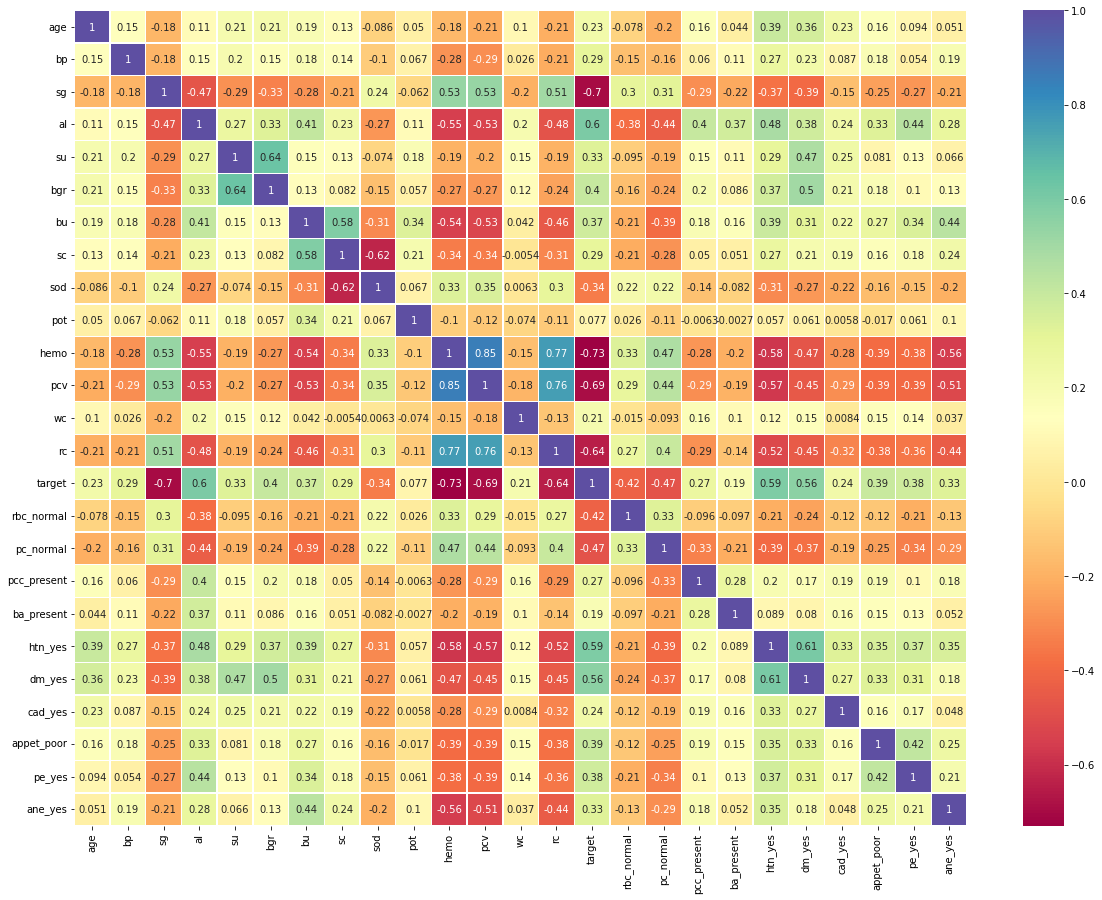

In [124]:
plt.figure(figsize = (20,15))
sns.heatmap(data=df_new2.corr(), annot=True, cmap='Spectral', linewidths=0.5)

#### Visualizing outliers

In [125]:
numeric_var.remove('target')

In [126]:
numeric_var

['age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

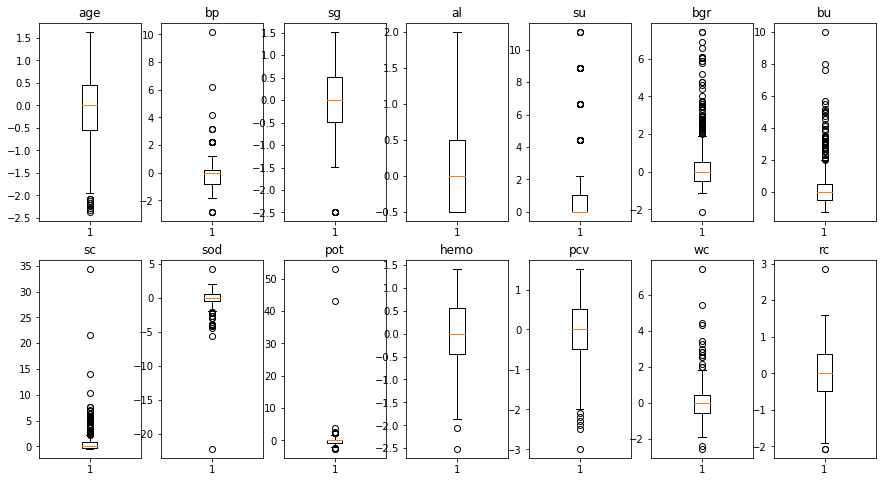

In [127]:
fig, axs = plt.subplots (2,7, figsize = (15,8))
axs = axs.ravel()
n = 0
for i in numeric_var:
  axs[n].boxplot(df_new2[i])
  axs[n].set_title(i)
  n = n +1

#### Determining Distribution of Numeric Variables

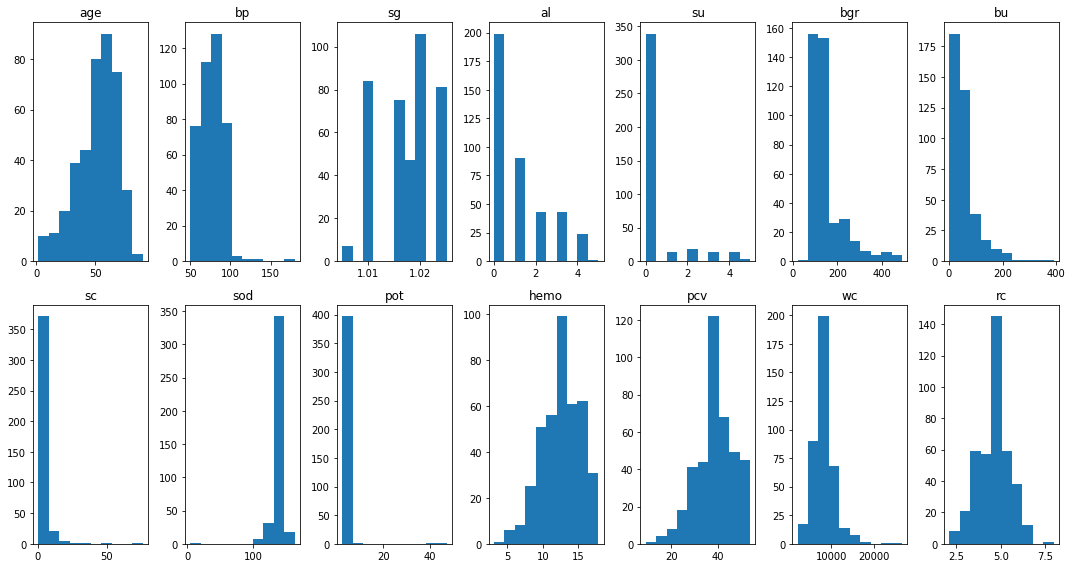

In [128]:
fig, axs = plt.subplots (2,7, figsize = (15,8))
axs = axs.ravel()
n = 0
for i in numeric_var:
  axs[n].hist(df_new[i])
  axs[n].set_title(i)
  plt.tight_layout()
  n = n +1

In [129]:
df_new[['bu', 'bgr', 'age', 'bp', 'hemo', 'pcv', 'wc', 'rc']].agg(['skew']).T

,skew
bu,2.698754
bgr,2.130422
age,-0.675848
bp,1.629876
hemo,-0.359057
pcv,-0.477800
wc,1.888887
rc,0.020857


In [130]:
df_new['bu_log']= np.log(df_new['bu'])
df_new['bu_sqrt'] = np.sqrt(df_new['bu'])

In [131]:
df_new['bgr_log']= np.log(df_new['bgr'])
df_new['bgr_sqrt'] = np.sqrt(df_new['bgr'])

In [132]:
df_new['bp_log']= np.log(df_new['bp'])
df_new['bp_sqrt'] = np.sqrt(df_new['bp'])

In [133]:
df_new[['bu_log','bu_sqrt', 'bgr_log','bgr_sqrt', 'bp_log','bp_sqrt']].agg(['skew']).T

,skew
bu_log,0.213512
bu_sqrt,1.460253
bgr_log,0.735140
bgr_sqrt,1.477057
bp_log,0.440477
bp_sqrt,0.932427


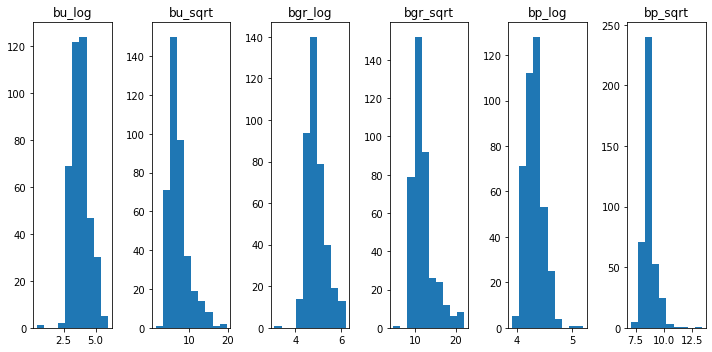

In [134]:
fig, axs = plt.subplots (1,6, figsize = (10,5))
axs = axs.ravel()
n = 0
for i in ['bu_log','bu_sqrt', 'bgr_log','bgr_sqrt', 'bp_log','bp_sqrt']:
  axs[n].hist(df_new[i])
  axs[n].set_title(i)
  plt.tight_layout()
  n = n +1

In [135]:
df_new.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,pcv,wc,rc,target,bu_log,bu_sqrt,bgr_log,bgr_sqrt,bp_log,bp_sqrt
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,44.0,7800.0,5.200,1,3.583519,6.000000,4.795791,11.000000,4.382027,8.944272
1,abnormal,normal,notpresent,notpresent,no,no,no,good,no,no,...,38.0,6000.0,3.825,1,2.890372,4.242641,4.997459,12.167026,3.912023,7.071068
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,31.0,7500.0,3.800,1,3.970292,7.280110,6.047372,20.566964,4.382027,8.944272
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,32.0,6700.0,3.900,1,4.025352,7.483315,4.762174,10.816654,4.248495,8.366600
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,35.0,7300.0,4.600,1,3.258097,5.099020,4.663439,10.295630,4.382027,8.944272


In [136]:
df_new.drop(['bu_sqrt', 'bgr_sqrt','bp_sqrt', 'bu', 'bgr', 'bp'], axis = 1, inplace = True)

In [137]:
df_new.head()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,...,sod,pot,hemo,pcv,wc,rc,target,bu_log,bgr_log,bp_log
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,...,137.528754,4.627244,15.4,44.0,7800.0,5.200,1,3.583519,4.795791,4.382027
1,abnormal,normal,notpresent,notpresent,no,no,no,good,no,no,...,137.528754,4.627244,11.3,38.0,6000.0,3.825,1,2.890372,4.997459,3.912023
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,...,137.528754,4.627244,9.6,31.0,7500.0,3.800,1,3.970292,6.047372,4.382027
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,...,111.000000,2.500000,11.2,32.0,6700.0,3.900,1,4.025352,4.762174,4.248495
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,...,137.528754,4.627244,11.6,35.0,7300.0,4.600,1,3.258097,4.663439,4.382027


#### Applying One Hot Encoding

In [138]:
df_new = pd.get_dummies(df_new, drop_first = True)

#### Feature Scailing with the RobustScaler Method

In [139]:
rs = RobustScaler ()

In [140]:
df_new.select_dtypes(include='float64').columns

Index(['age', 'sg', 'al', 'su', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc',
       'bu_log', 'bgr_log', 'bp_log'],
      dtype='object')

In [141]:
df_new[['age', 'sg', 'al', 'su', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc','bu_log', 'bgr_log', 'bp_log']] = rs.fit_transform(df_new[['age', 'sg', 'al', 'su', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc','bu_log', 'bgr_log', 'bp_log']])

In [142]:
df_new.columns

Index(['age', 'sg', 'al', 'su', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc',
       'target', 'bu_log', 'bgr_log', 'bp_log', 'rbc_normal', 'pc_normal',
       'pcc_present', 'ba_present', 'htn_yes', 'dm_yes', 'cad_yes',
       'appet_poor', 'pe_yes', 'ane_yes'],
      dtype='object')

#### Separating Data into Test and Training Set

In [143]:
from sklearn.model_selection import train_test_split

In [144]:
X = df_new.drop('target', axis = 1)
y = df_new[['target']]

In [145]:
X.head()

,age,sg,al,su,sc,sod,pot,hemo,pcv,wc,...,rbc_normal,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_poor,pe_yes,ane_yes
0,-0.272727,0.518414,0.0,0.000000,-0.092062,0.000000,0.000000,0.766284,0.51155,-0.249947,...,1,1,0,0,1,1,0,0,0,0
1,-2.136364,0.518414,1.5,0.000000,-0.276185,0.000000,0.000000,-0.327050,-0.08845,-0.992215,...,0,1,0,0,0,0,0,0,0,0
2,0.363636,-1.481586,0.5,6.664557,0.184124,0.000000,0.000000,-0.780383,-0.78845,-0.373659,...,1,1,0,0,0,1,0,1,0,1
3,-0.272727,-2.481586,1.5,0.000000,1.104741,-4.421459,-2.659054,-0.353716,-0.68845,-0.703556,...,1,0,1,0,1,0,0,1,1,1
4,-0.136364,-1.481586,0.5,0.000000,0.000000,0.000000,0.000000,-0.247050,-0.38845,-0.456133,...,1,1,0,0,0,0,0,0,0,0


In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

In [147]:
X_train, X_val, y_train, y_val= train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [160]:
print(X_train.shape)
print(X_val.shape)

(288, 24)
(72, 24)


Modelling

In [154]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix 

In [164]:
cl = DecisionTreeClassifier()
dt = cl.fit(X_train, y_train)
y_pred = dt.predict(X_val)
accu_dt = accuracy_score(y_val, y_pred)

cl_2 = RandomForestClassifier()
rf = cl_2.fit(X_train, y_train)
y_pred2 = rf.predict(X_val)
accu_rf = accuracy_score (y_val, y_pred2)

In [165]:
accu_rf

1.0

In [166]:
y_pred = rf.predict(X_test)
accuracy_score(y_test, y_pred)

0.975

In [162]:
confusion_matrix(y_test, y_pred)

array([[14,  0],
       [ 1, 25]])